
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# MIGUEL ANGEL NAVARRO ARENAS

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [1]:
#!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
covertype = fetch_ucirepo(id=31) 

In [3]:
covertype.data['original'].to_csv('covtype.csv', index=False)

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline

In [5]:
# se carga el dataset
df = pd.read_csv('covtype.csv')

In [6]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

¿Cuántas instancias de datos tiene el dataset?

In [8]:
## PON AQUÍ TU CÓDIGO

In [9]:
df.shape[0]

581012

¿Cuántas variables continuas hay en el dataset?

In [10]:
## PON AQUÍ TU CÓDIGO

In [11]:
continuous_vars = df.select_dtypes(include=[np.number]).columns
num_continuous_vars = len(continuous_vars)
num_continuous_vars

55

<p>Esto se produce porque en el dataset original todas las variables vienen como enteros, aunque hay algunas de ellas que se podrían categorizar dependiendo del número de valores diferentes que tengan por cada distribución. Esto también, nos permitirá reducir el tamaño de nuestro dataset. </p>

In [12]:
# Obtener las 10 primeras variables
first_10_vars = df.columns[:10]

# Crear un DataFrame con las variables y la cantidad de valores diferentes
unique_values_count = df[first_10_vars].nunique().reset_index()
unique_values_count.columns = ['Variable', 'Unique Values']

# Imprimir la tabla
print(unique_values_count)

                             Variable  Unique Values
0                           Elevation           1978
1                              Aspect            361
2                               Slope             67
3    Horizontal_Distance_To_Hydrology            551
4      Vertical_Distance_To_Hydrology            700
5     Horizontal_Distance_To_Roadways           5785
6                       Hillshade_9am            207
7                      Hillshade_Noon            185
8                       Hillshade_3pm            255
9  Horizontal_Distance_To_Fire_Points           5827


In [13]:
# Obtener las siguientes 10 variables
next_10_vars = df.columns[10:20]

# Crear un DataFrame con las variables y la cantidad de valores diferentes
unique_values_count_next = df[next_10_vars].nunique().reset_index()
unique_values_count_next.columns = ['Variable', 'Unique Values']

# Imprimir la tabla
print(unique_values_count_next)

           Variable  Unique Values
0  Wilderness_Area1              2
1  Wilderness_Area2              2
2  Wilderness_Area3              2
3  Wilderness_Area4              2
4        Soil_Type1              2
5        Soil_Type2              2
6        Soil_Type3              2
7        Soil_Type4              2
8        Soil_Type5              2
9        Soil_Type6              2


In [14]:
# Obtener las siguientes 10 variables
next_10_vars = df.columns[20:30]

# Crear un DataFrame con las variables y la cantidad de valores diferentes
unique_values_count_next = df[next_10_vars].nunique().reset_index()
unique_values_count_next.columns = ['Variable', 'Unique Values']

# Imprimir la tabla
print(unique_values_count_next)

      Variable  Unique Values
0   Soil_Type7              2
1   Soil_Type8              2
2   Soil_Type9              2
3  Soil_Type10              2
4  Soil_Type11              2
5  Soil_Type12              2
6  Soil_Type13              2
7  Soil_Type14              2
8  Soil_Type15              2
9  Soil_Type16              2


In [15]:
# Obtener las siguientes 10 variables
next_10_vars = df.columns[30:40]

# Crear un DataFrame con las variables y la cantidad de valores diferentes
unique_values_count_next = df[next_10_vars].nunique().reset_index()
unique_values_count_next.columns = ['Variable', 'Unique Values']

# Imprimir la tabla
print(unique_values_count_next)

      Variable  Unique Values
0  Soil_Type17              2
1  Soil_Type18              2
2  Soil_Type19              2
3  Soil_Type20              2
4  Soil_Type21              2
5  Soil_Type22              2
6  Soil_Type23              2
7  Soil_Type24              2
8  Soil_Type25              2
9  Soil_Type26              2


In [16]:
# Obtener las siguientes 10 variables
next_10_vars = df.columns[40:50]

# Crear un DataFrame con las variables y la cantidad de valores diferentes
unique_values_count_next = df[next_10_vars].nunique().reset_index()
unique_values_count_next.columns = ['Variable', 'Unique Values']

# Imprimir la tabla
print(unique_values_count_next)

      Variable  Unique Values
0  Soil_Type27              2
1  Soil_Type28              2
2  Soil_Type29              2
3  Soil_Type30              2
4  Soil_Type31              2
5  Soil_Type32              2
6  Soil_Type33              2
7  Soil_Type34              2
8  Soil_Type35              2
9  Soil_Type36              2


In [17]:
# Obtener las siguientes 10 variables
last_vars = df.columns[50:]

# Crear un DataFrame con las variables y la cantidad de valores diferentes
unique_values_count_next = df[last_vars].nunique().reset_index()
unique_values_count_next.columns = ['Variable', 'Unique Values']

# Imprimir la tabla
print(unique_values_count_next)

      Variable  Unique Values
0  Soil_Type37              2
1  Soil_Type38              2
2  Soil_Type39              2
3  Soil_Type40              2
4   Cover_Type              7


<p>Según la descripción del dataset, podemos observar que el cover_type es nuestra variable objetivo (esto se puede ver en el apartado "Additional Variable Information"). Del análisis que hemos hecho previamente, podemos observar que, desde la variable número 10 en adelante, sólo tenemos 2 valores únicos, por lo que podemos convertir todos estos en categóricas, para ahorrar espacio en nuestro dataset. </p>

In [18]:
# Transformar las variables desde la 10 hasta la penúltima en categóricas
for col in df.columns[10:-1]:
    df[col] = df[col].astype('category')


¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

In [19]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
num_categorical_vars = len(categorical_vars)
num_categorical_vars

44

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Elevation                           581012 non-null  int64   
 1   Aspect                              581012 non-null  int64   
 2   Slope                               581012 non-null  int64   
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64   
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64   
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64   
 6   Hillshade_9am                       581012 non-null  int64   
 7   Hillshade_Noon                      581012 non-null  int64   
 8   Hillshade_3pm                       581012 non-null  int64   
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64   
 10  Wilderness_Area1                    581012 non-null  category
 11  Wilderness_Ar

<p>Con esto, podemos observar que hemos reducido considerablemente el uso de memoria que hace el dataset, pasando de 243.8 MB a 73.1 MB. Así, también, las variables que son categóricas las podemos tratar como binarias, lo cual nos será más sencillo a la hora de entrenar nuestro modelo.</p>

¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

In [21]:
## PON AQUÍ TU CÓDIGO

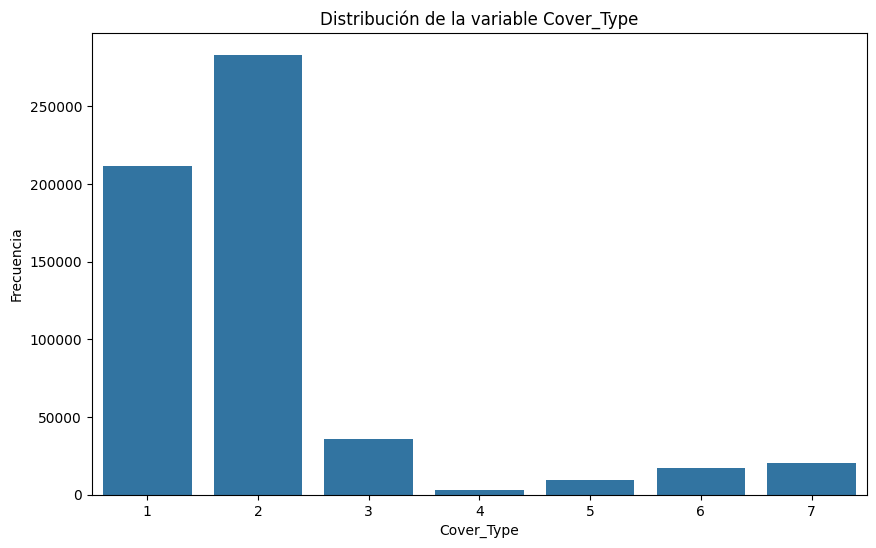

In [22]:
# Distribución de la variable objetivo "Cover_Type"
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=df)
plt.title('Distribución de la variable Cover_Type')
plt.xlabel('Cover_Type')
plt.ylabel('Frecuencia')
plt.show()

<p>Con esta distribución podemos observar que el dataset no está para nada balanceado. La clase predominante es la dos, y detrás de esta la uno, con unas frecuencias de aparición mucho más grandes que las del resto de variables. La variable 4 apenas tiene aparición. Esto, nos provocará posibles sesgos a la hora de realizar nuestro entrenamiento, los cuales tendremos que paliar con diferentes técnicas (que veremos más adelante), porque, por lo contrario, si entrenamos el modelo solo con la precisión, hará "trampas" y clasificará mucho más con la variable 1 y 2 porque así tiene menos posibilidades de equivocarse que con las otras. Por tanto, esto lo debemos de tener muy en cuenta en nuestro entrenamiento. </p>

¿Existen valores nulos o perdidos en el dataset?

In [23]:
## PON AQUÍ TU CÓDIGO

In [24]:
print(df.isnull().sum().sum())

0


¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamosfiltar aquellas correlaciones superiores al 0.80 con la variable de clase.

In [25]:
## PON AQUÍ TU CÓDIGO

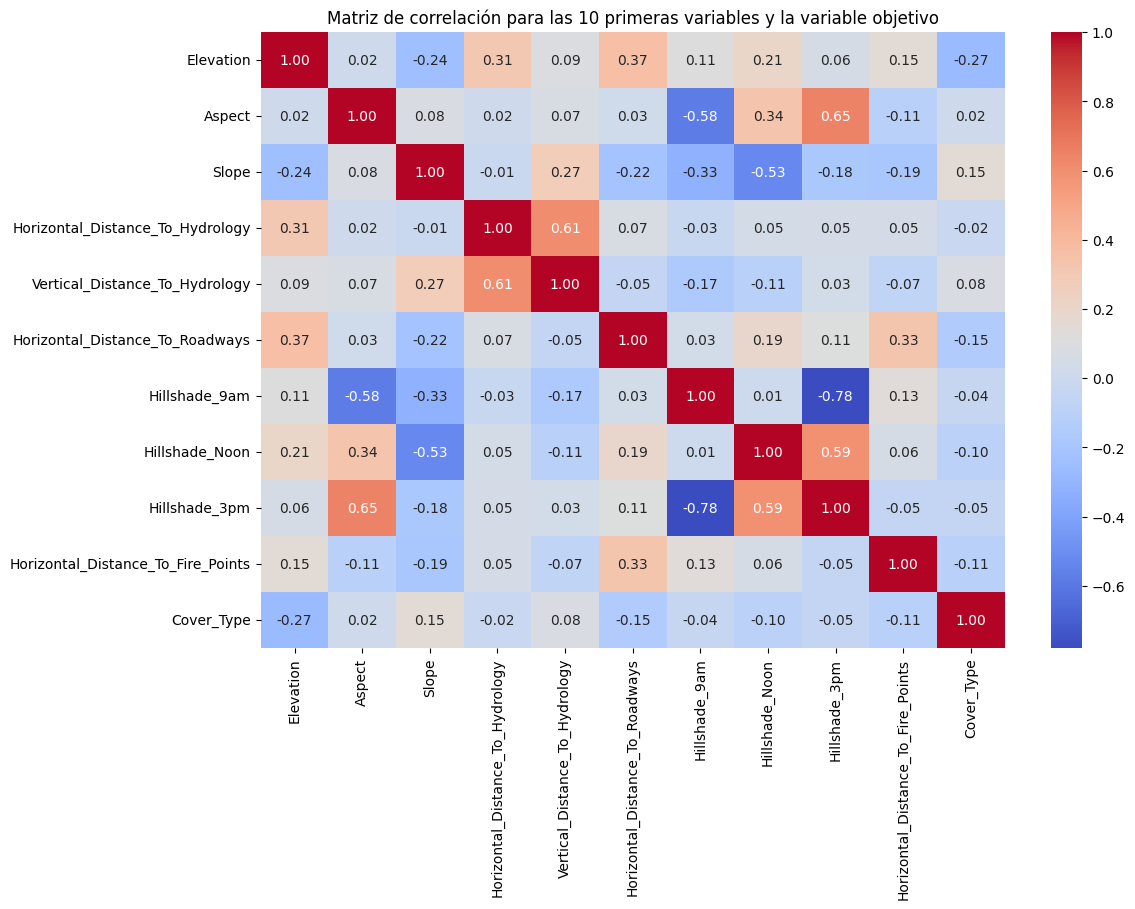

In [26]:
# Seleccionar las 10 primeras variables y la variable objetivo
vars_to_correlate = list(first_10_vars) + ['Cover_Type']

# Calcular la matriz de correlación
correlation_matrix = df[vars_to_correlate].corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación para las 10 primeras variables y la variable objetivo')
plt.show()

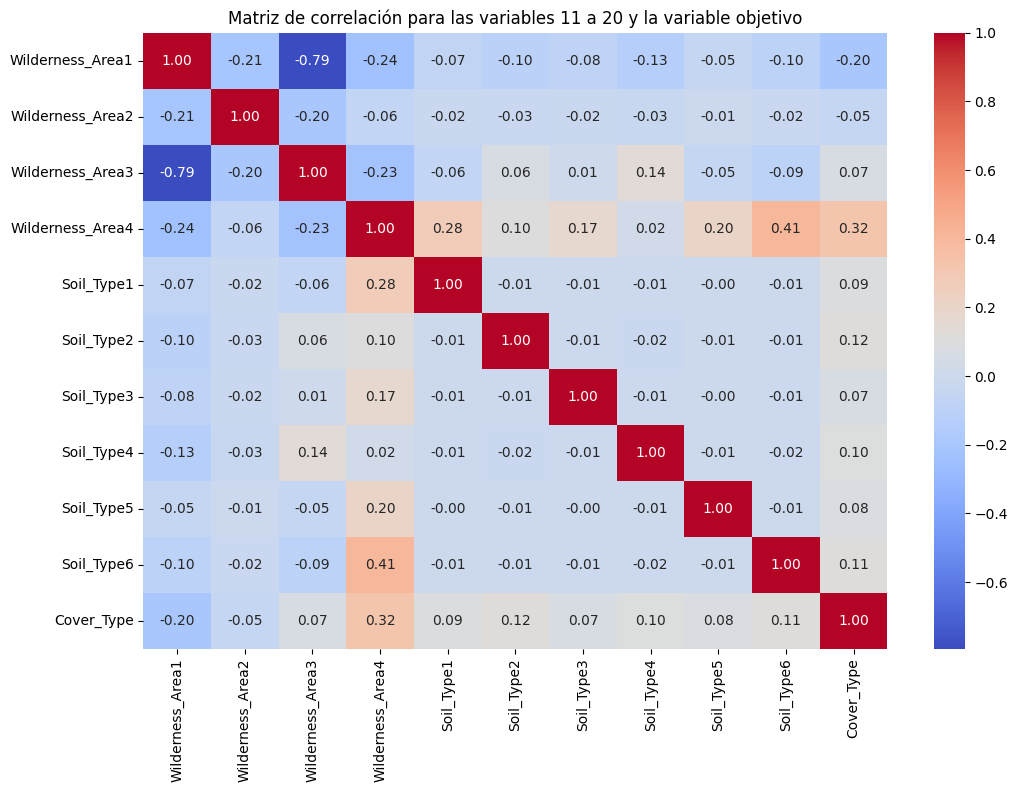

In [27]:
# Seleccionar las variables desde la 11 hasta la 20 y la variable objetivo
vars_to_correlate = list(df.columns[10:20]) + ['Cover_Type']

# Calcular la matriz de correlación
correlation_matrix = df[vars_to_correlate].corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación para las variables 11 a 20 y la variable objetivo')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=1)

/opt/anaconda3/envs/actividad2_TAA/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/actividad2_TAA/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


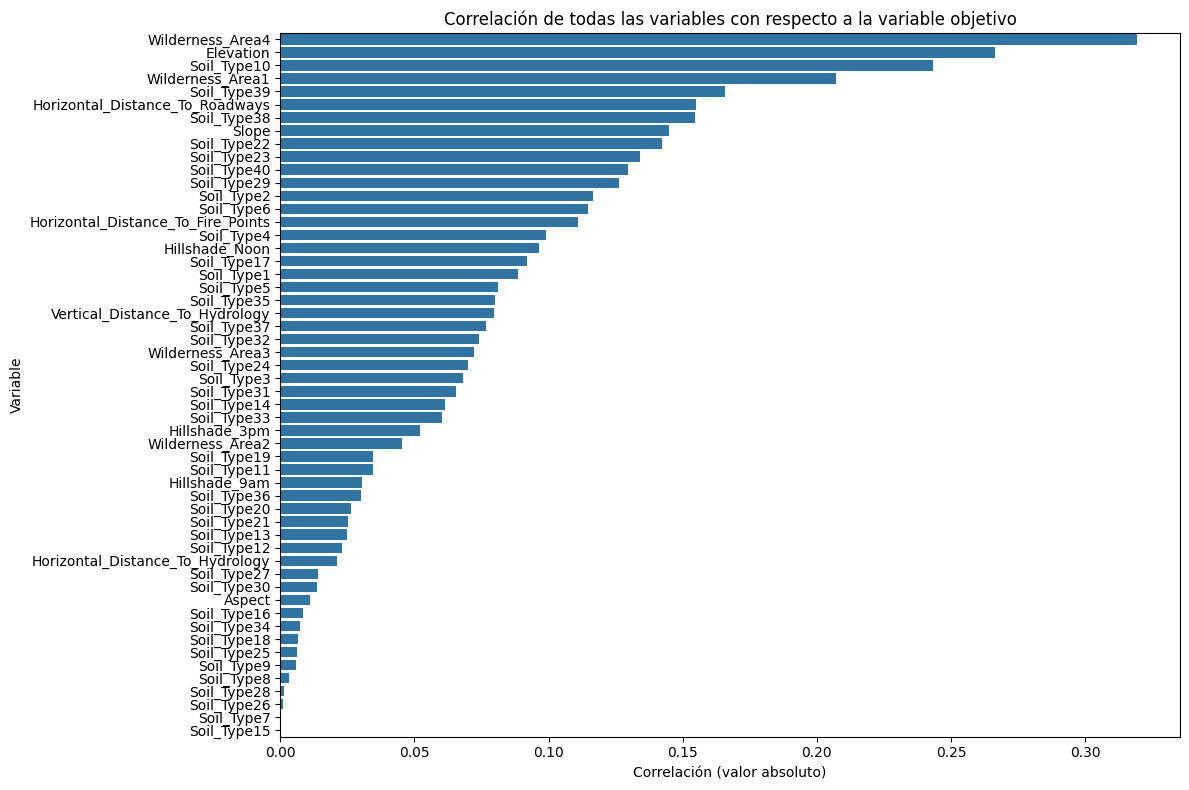

In [29]:
# Calcular la matriz de correlación para todas las variables con la variable objetivo
correlations_with_target = pd.DataFrame()
correlations_with_target['Variable'] = X_train.columns
correlations_with_target['Correlation'] = [abs(X_train[col].corr(y_train)) for col in X_train.columns]

# Ordenar los resultados por la correlación en orden descendente
correlations_with_target = correlations_with_target.sort_values(by='Correlation', ascending=False)

# Visualizar los resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Variable', data=correlations_with_target)
plt.title('Correlación de todas las variables con respecto a la variable objetivo')
plt.xlabel('Correlación (valor absoluto)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

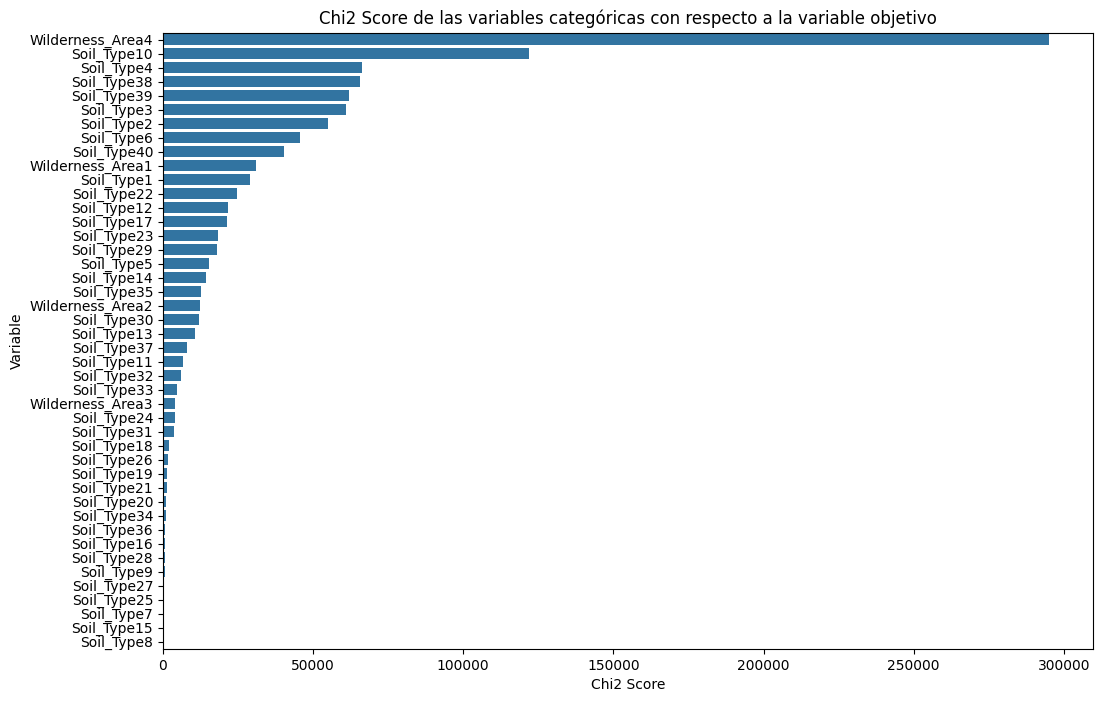

In [30]:
from sklearn.feature_selection import chi2

# Separar las variables categóricas y la variable objetivo
X_categorical = df[categorical_vars]
y = df['Cover_Type']

# Aplicar la prueba de chi-cuadrado
chi_scores, p_values = chi2(X_categorical, y)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({'Variable': categorical_vars, 'Chi2 Score': chi_scores, 'p-value': p_values})

# Ordenar los resultados por el Chi2 Score
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Visualizar los resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='Chi2 Score', y='Variable', data=chi2_results)
plt.title('Chi2 Score de las variables categóricas con respecto a la variable objetivo')
plt.xlabel('Chi2 Score')
plt.ylabel('Variable')
plt.show()

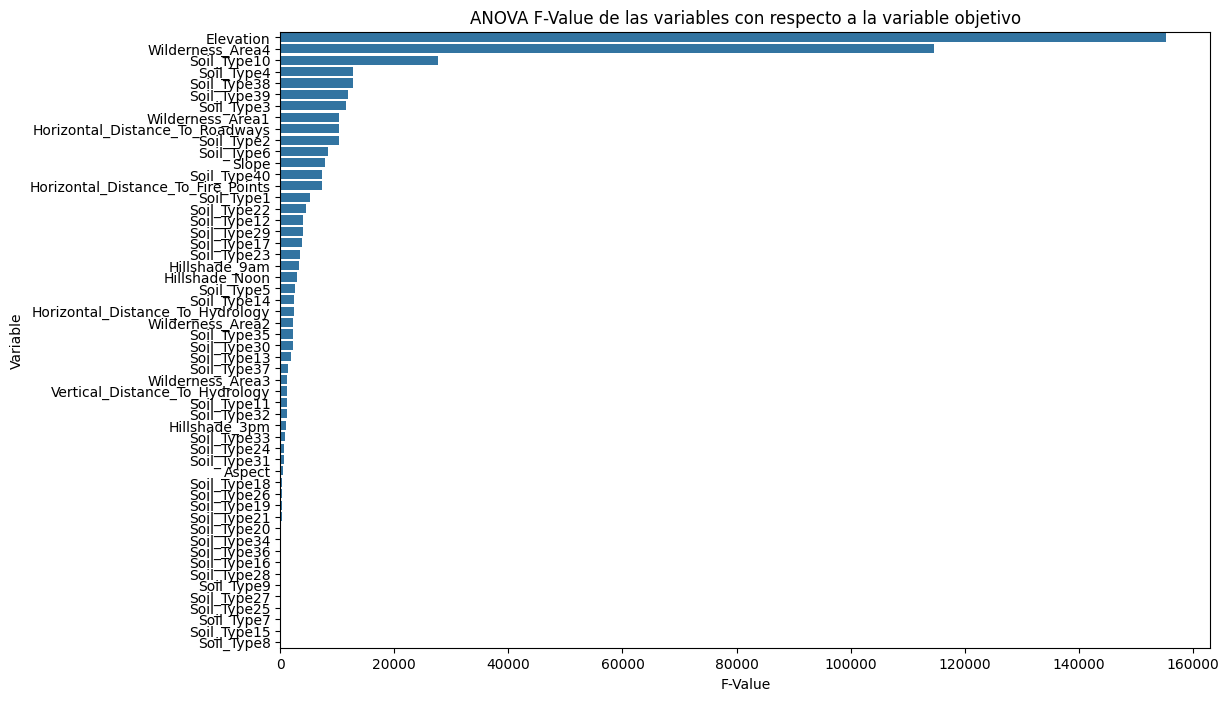

In [31]:
from sklearn.feature_selection import f_classif

# Separar las variables independientes y la variable objetivo
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Aplicar ANOVA
f_values, p_values = f_classif(X, y)

# Crear un DataFrame con los resultados
anova_results = pd.DataFrame({'Variable': X.columns, 'F-Value': f_values, 'p-value': p_values})

# Ordenar los resultados por el F-Value
anova_results = anova_results.sort_values(by='F-Value', ascending=False)

# Visualizar los resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='F-Value', y='Variable', data=anova_results)
plt.title('ANOVA F-Value de las variables con respecto a la variable objetivo')
plt.xlabel('F-Value')
plt.ylabel('Variable')
plt.show()

¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

<p>En este caso, podemos obsevar tanto en anova como en la matriz de correlación que las variables más prometedoras para comprobar esto son "Elevation", "Wilderness_Area4" y "Soil_type10", en estas dos opciones, podemos comparar variables numéricas y variables categóricas para entender la correlación entre ellas. Por otro lado, cuando aplicamos chi2, lo hacemos entre variables categóricas sólo, donde también observamos que los más prometedores son "Wilderness_Area4", "Soil_type10" y "Soil_type4", coincidiendo con los otros dos estudios de correlación que hemos hecho y confirmando que las tres que hemos mencionado al prinicpio son las 3 variables más correlacionadas con la variable objetivo y, por tanto, las mejores en cuanto a influenciar la clasificición de los datos.</p>

In [32]:
X_train.shape, X_test.shape

((116202, 54), (464810, 54))

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

- n_estimators -> es el número de árboles que hay en el clasificador. Normalmente, a mayor número mejores resultados pero peores tiempos y mayor posibilidad de sobreajuste .
- criterion -> mide la calidad de las divisiones en los nodos, los más comunes son 'gini' y 'entropy'.
- max_depth -> es la profundidad máxima de los árboles, valores más bajos pueden evitar sobreajuste pero pueden producir peores resultados, si no se establece un máximo, todos los árboles crecen hasta que todas sus ramas son puras. 
- min_samples_split -> es el número de muestras mínimo necesario para que un nodo se expanda. Con valores bajos producimos un árbol mucho más profundo y específico (mayor sobreajuste), mientras que valores altos dan lugar a un árbol mucho más genérico (menos sobreajuste). 
- min_samples_leaf -> define el mínimo de muestras que debe tener una hoja. Un valor mayor evita la creación de nodos con muy pocas muestras, mejorando la generalización.
- max_features -> es el número máximo de características evaluadas en una división, puede ser un valor fijo o una raiz cuadrada o un logaritmo. Este hiperparámetro introduce aleatoriedad, reduce la correlación entre los árboles y mejora el rendimiento general del modelo.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Es el parámetro que sirve para indicar cierta importancia a 

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

In [33]:
## PON AQUÍ TU RESPUESTA Y/O CÓDIGO


In [34]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

# Convertir los datos escalados de nuevo a DataFrame para mantener la estructura original
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [35]:
# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.ensemble import RandomForestClassifier

n_arboles = {5, 10, 20, 50, 100}
particion = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_feature = None

randomForest = [RandomForestClassifier(n_estimators = i, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None) for i in n_arboles]


In [36]:
# PON AQUÍ TU CÓDIGO PARA EL ENTRENAMIENTO

In [37]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464810 entries, 0 to 464809
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           464810 non-null  float64
 1   Aspect                              464810 non-null  float64
 2   Slope                               464810 non-null  float64
 3   Horizontal_Distance_To_Hydrology    464810 non-null  float64
 4   Vertical_Distance_To_Hydrology      464810 non-null  float64
 5   Horizontal_Distance_To_Roadways     464810 non-null  float64
 6   Hillshade_9am                       464810 non-null  float64
 7   Hillshade_Noon                      464810 non-null  float64
 8   Hillshade_3pm                       464810 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  464810 non-null  float64
 10  Wilderness_Area1                    464810 non-null  float64
 11  Wilderness_Area2          

In [38]:
# Entrenar los modelos de Random Forest
for model in randomForest:
    model.fit(X_train_scaled, y_train)

Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

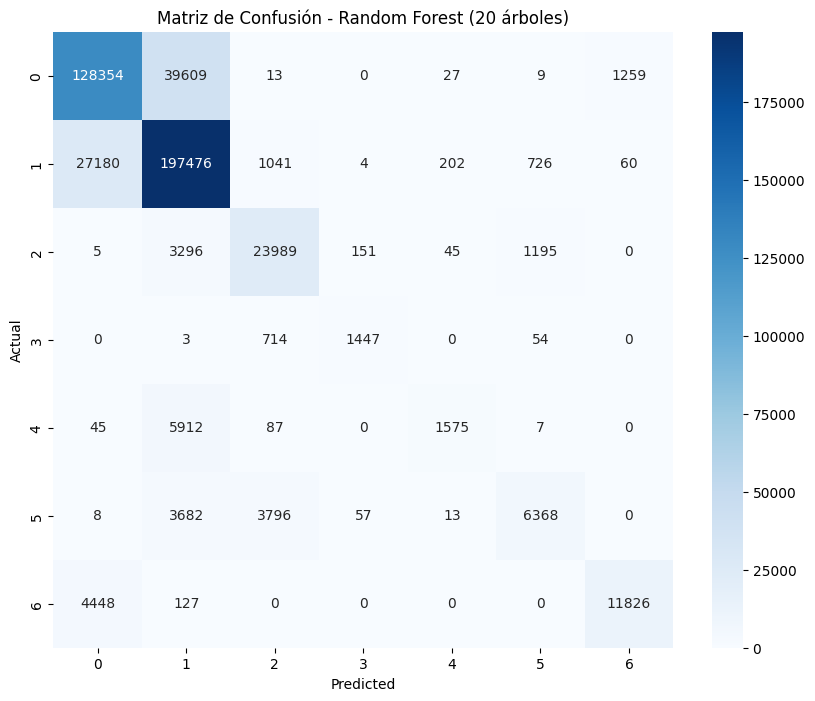

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Encontrar el modelo entrenado con 20 árboles
model_20_trees = next(model for model in randomForest if model.n_estimators == 20)

# Predecir las etiquetas del conjunto de prueba
y_pred = model_20_trees.predict(X_test_scaled)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest (20 árboles)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

¿Cuántos ejemplos ha clasificado correctamente?

In [40]:
correctly_classified = np.trace(conf_matrix)
print(correctly_classified)

371035


<p>Se han clasificado correctamente 371390 valores que corresponden a los valores que se encuentran en la diagonal descendente de nuestra matriz de confusión.</p>

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

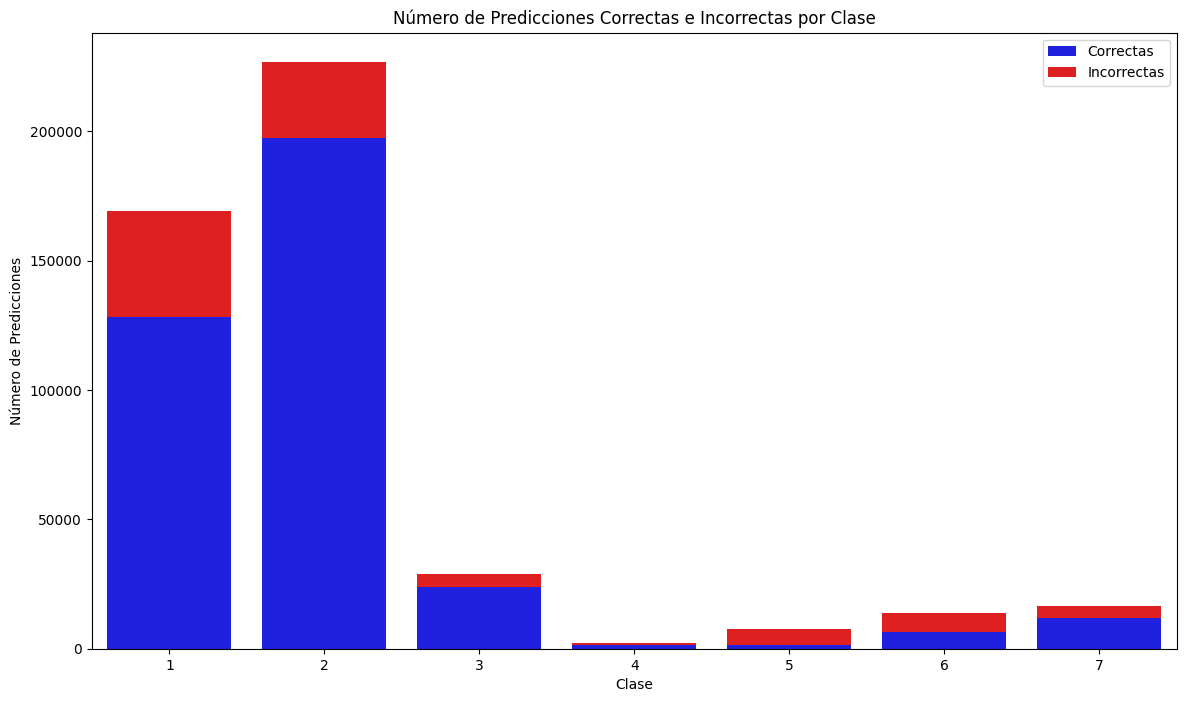

/var/folders/tz/jj92p2gs4ssdc6dvqg1ybjz80000gn/T/ipykernel_65141/2156541340.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clase', y='Porcentaje Correctas', data=results_df, palette='viridis')


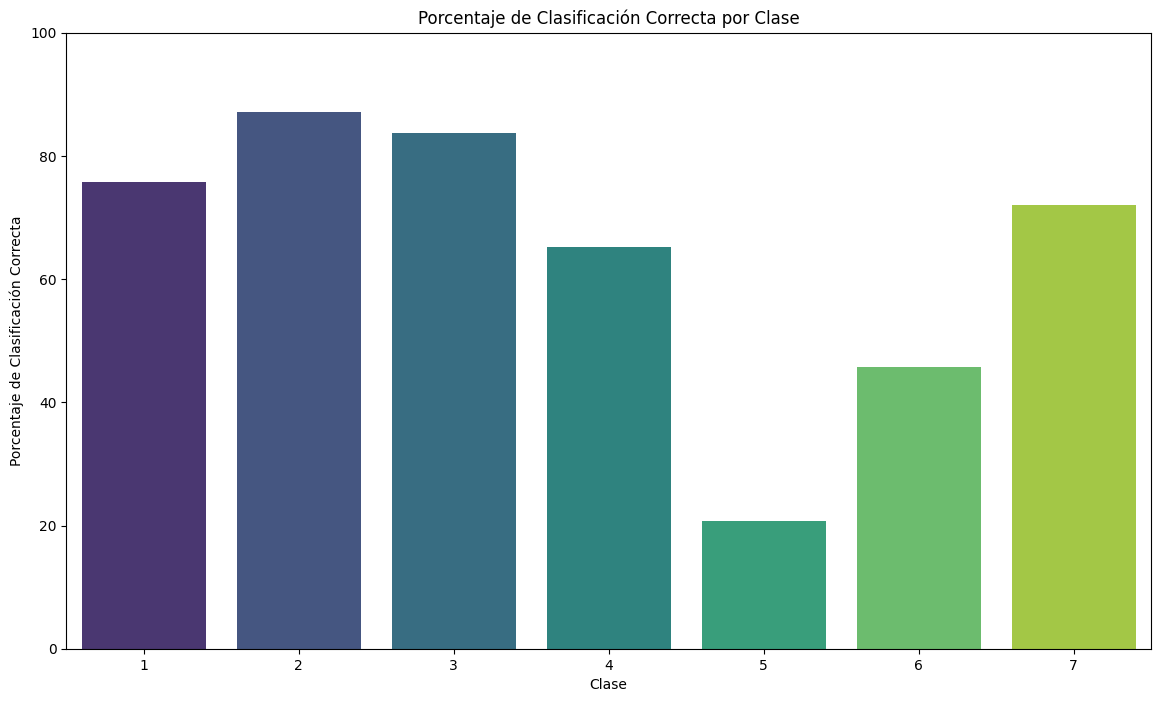

In [41]:
# Calcular el número de predicciones correctas e incorrectas para cada clase
correct_predictions = np.diag(conf_matrix)
incorrect_predictions = conf_matrix.sum(axis=1) - correct_predictions

# Calcular el porcentaje de clasificación correcta para cada clase
total_predictions = conf_matrix.sum(axis=1)
correct_percentage = (correct_predictions / total_predictions) * 100

# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame({
    'Clase': np.arange(1, len(correct_predictions) + 1),
    'Correctas': correct_predictions,
    'Incorrectas': incorrect_predictions,
    'Porcentaje Correctas': correct_percentage
})

# Visualizar los resultados
plt.figure(figsize=(14, 8))
sns.barplot(x='Clase', y='Correctas', data=results_df, color='b', label='Correctas')
sns.barplot(x='Clase', y='Incorrectas', data=results_df, color='r', label='Incorrectas', bottom=results_df['Correctas'])
plt.title('Número de Predicciones Correctas e Incorrectas por Clase')
plt.xlabel('Clase')
plt.ylabel('Número de Predicciones')
plt.legend()
plt.show()

# Mostrar el porcentaje de clasificación correcta por cada clase
plt.figure(figsize=(14, 8))
sns.barplot(x='Clase', y='Porcentaje Correctas', data=results_df, palette='viridis')
plt.title('Porcentaje de Clasificación Correcta por Clase')
plt.xlabel('Clase')
plt.ylabel('Porcentaje de Clasificación Correcta')
plt.ylim(0, 100)
plt.show()

<h1>EXPLICACIÓN AQUÍ</h1>

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [42]:
# Evaluar cada modelo y comparar sus resultados
for model in randomForest:
    y_pred = model.predict(X_test_scaled)
    print(f"\nReporte para Random Forest con {model.n_estimators} árboles:")
    print("Precisión:", model.score(X_test_scaled, y_test))
    print("------------------------------------------")


Reporte para Random Forest con 50 árboles:
Precisión: 0.7988963232288462
------------------------------------------

Reporte para Random Forest con 100 árboles:
Precisión: 0.7981863557152384
------------------------------------------

Reporte para Random Forest con 5 árboles:
Precisión: 0.7935414470428778
------------------------------------------

Reporte para Random Forest con 20 árboles:
Precisión: 0.7982508982164755
------------------------------------------

Reporte para Random Forest con 10 árboles:
Precisión: 0.7947828144833373
------------------------------------------


In [43]:
from sklearn.metrics import classification_report

# Evaluar cada modelo y almacenar los resultados
model_results = {}
for model in randomForest:
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[model.n_estimators] = report

# Encontrar el modelo con la mejor precisión promedio
best_model_n_estimators = max(model_results, key=lambda x: model_results[x]['weighted avg']['precision'])
best_model = next(model for model in randomForest if model.n_estimators == best_model_n_estimators)

# Mostrar el reporte de clasificación del mejor modelo
print(f"Mejor modelo: {best_model_n_estimators} árboles")
print(classification_report(y_test, best_model.predict(X_test_scaled)))

Mejor modelo: 20 árboles
              precision    recall  f1-score   support

           1       0.80      0.76      0.78    169271
           2       0.79      0.87      0.83    226689
           3       0.81      0.84      0.82     28681
           4       0.87      0.65      0.75      2218
           5       0.85      0.21      0.33      7626
           6       0.76      0.46      0.57     13924
           7       0.90      0.72      0.80     16401

    accuracy                           0.80    464810
   macro avg       0.83      0.64      0.70    464810
weighted avg       0.80      0.80      0.79    464810



Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluación detallada de cada modelo en el conjunto de test

# Almacenar métricas para cada modelo
model_metrics = {}

for model in randomForest:
    y_pred = model.predict(X_test_scaled)
    
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_macro': precision_score(y_test, y_pred, average='macro'),
        'recall_macro': recall_score(y_test, y_pred, average='macro'),
        'f1_macro': f1_score(y_test, y_pred, average='macro'),
        'precision_weighted': precision_score(y_test, y_pred, average='weighted'),
        'recall_weighted': recall_score(y_test, y_pred, average='weighted'),
        'f1_weighted': f1_score(y_test, y_pred, average='weighted')
    }
    
    model_metrics[model.n_estimators] = metrics

# Crear DataFrame con los resultados
results_df = pd.DataFrame(model_metrics).T
results_df.index.name = 'n_estimators'
results_df = results_df.sort_index()

print("Resultados de evaluación en el conjunto de test:")
print(results_df)

Resultados de evaluación en el conjunto de test:
              accuracy  precision_macro  recall_macro  f1_macro  \
n_estimators                                                      
5             0.793541         0.801920      0.646917  0.697365   
10            0.794783         0.816588      0.639133  0.691611   
20            0.798251         0.825783      0.643304  0.697294   
50            0.798896         0.818779      0.644213  0.697394   
100           0.798186         0.823753      0.645117  0.698538   

              precision_weighted  recall_weighted  f1_weighted  
n_estimators                                                    
5                       0.793137         0.793541     0.788935  
10                      0.795712         0.794783     0.789349  
20                      0.799693         0.798251     0.793010  
50                      0.799632         0.798896     0.793803  
100                     0.799304         0.798186     0.793096  


In [45]:
# Crear un DataFrame para almacenar las puntuaciones
scores_df = pd.DataFrame(index=results_df.index, columns=results_df.columns)

# Asignar puntuaciones para cada métrica
for metric in results_df.columns:
    sorted_models = results_df[metric].sort_values(ascending=False).index
    scores = range(len(sorted_models), 0, -1)
    scores_df.loc[sorted_models, metric] = scores

# Calcular la puntuación total para cada modelo
scores_df['total_score'] = scores_df.sum(axis=1)

# Mostrar las puntuaciones obtenidas por cada modelo
print(scores_df)

# Determinar el modelo con la mejor puntuación total
best_model_n_estimators = scores_df['total_score'].idxmax()
print(f"El modelo que mejor se ha comportado es el que tiene {best_model_n_estimators} árboles.")

             accuracy precision_macro recall_macro f1_macro  \
n_estimators                                                  
5                   1               1            5        3   
10                  2               2            1        1   
20                  4               5            2        2   
50                  5               3            3        4   
100                 3               4            4        5   

             precision_weighted recall_weighted f1_weighted total_score  
n_estimators                                                             
5                             1               1           1          13  
10                            2               2           2          12  
20                            5               4           3          25  
50                            4               5           5          29  
100                           3               3           4          26  
El modelo que mejor se ha comportado es 

<p> Para cada una de las métricas y para cada uno de los random forest, he hecho una puntuación de 1 a 5 según si era mejor o pero en cada una de ellas, por lo que el que obtuviera un 5 significaba que para la métrica que se está comparando es el mejor de los modelos. Luego, he sumado las puntuaciones obtenidas para cada una de las métricas y el que mayor puntuación total tuviera es el mejor clasificador. </p>

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


<p>NOTA: vamos a ejecutar los dos modelos con mejores resultados, el de 50 árboles y el de 100 árboles, que en las ejecuciones que he ido haciendo durante la práctica han sido los que mejores resultados han obtenido. </p>

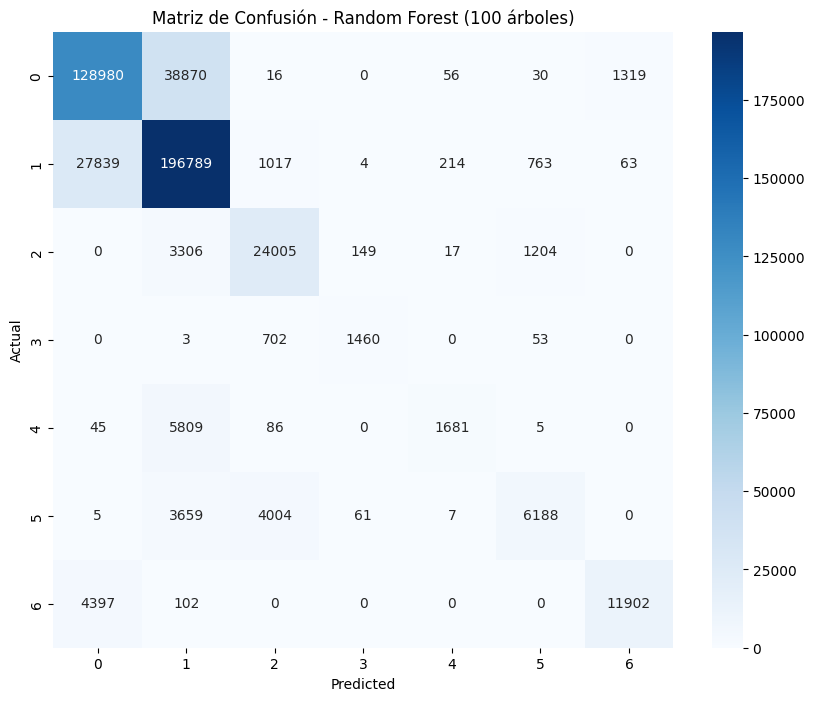

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Encontrar el modelo entrenado con 100 árboles
model_100_trees = next(model for model in randomForest if model.n_estimators == 100)

# Predecir las etiquetas del conjunto de prueba
y_pred_100 = model_100_trees.predict(X_test_scaled)

# Generar la matriz de confusión
conf_matrix_100 = confusion_matrix(y_test, y_pred_100)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_100, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest (100 árboles)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

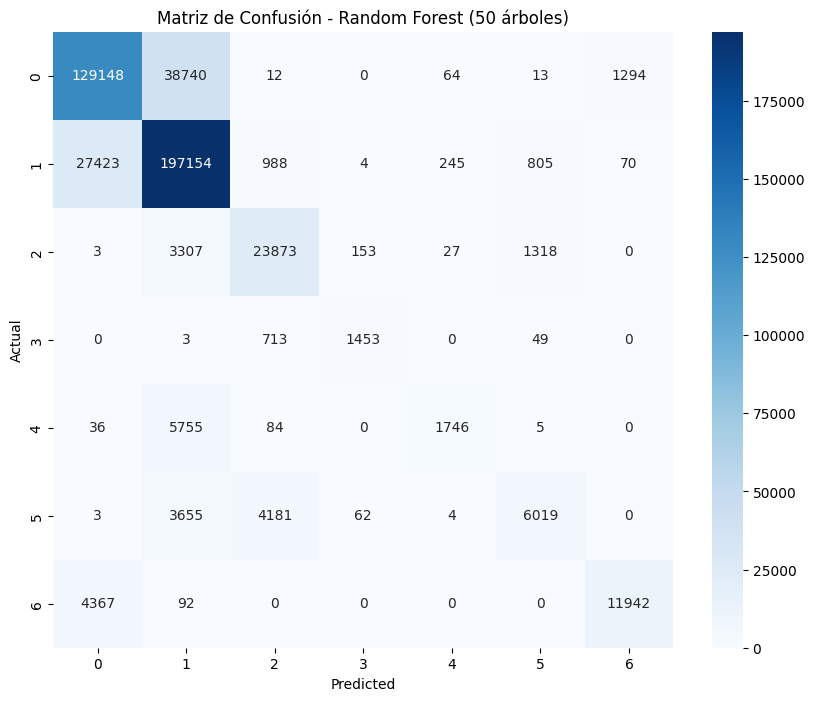

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Encontrar el modelo entrenado con 50 árboles
model_50_trees = next(model for model in randomForest if model.n_estimators == 50)

# Predecir las etiquetas del conjunto de prueba
y_pred_50 = model_50_trees.predict(X_test_scaled)

# Generar la matriz de confusión
conf_matrix_50 = confusion_matrix(y_test, y_pred_50)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_50, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest (50 árboles)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
# Calculamos el número de ejemplos bien y mal clasificados
correct_total = np.sum(np.diag(conf_matrix_100))  # Suma de la diagonal
incorrect_total = np.sum(conf_matrix_100) - correct_total

print(f"Ejemplos clasificados correctamente: {correct_total}")
print(f"Ejemplos clasificados incorrectamente: {incorrect_total}")
print(f"Porcentaje de acierto: {(correct_total/np.sum(conf_matrix_100))*100:.2f}%")

Ejemplos clasificados correctamente: 371005
Ejemplos clasificados incorrectamente: 93805
Porcentaje de acierto: 79.82%


In [49]:
# Calculamos el número de ejemplos bien y mal clasificados
correct_total = np.sum(np.diag(conf_matrix_50))  # Suma de la diagonal
incorrect_total = np.sum(conf_matrix_50) - correct_total

print(f"Ejemplos clasificados correctamente: {correct_total}")
print(f"Ejemplos clasificados incorrectamente: {incorrect_total}")
print(f"Porcentaje de acierto: {(correct_total/np.sum(conf_matrix_50))*100:.2f}%")

Ejemplos clasificados correctamente: 371335
Ejemplos clasificados incorrectamente: 93475
Porcentaje de acierto: 79.89%


Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

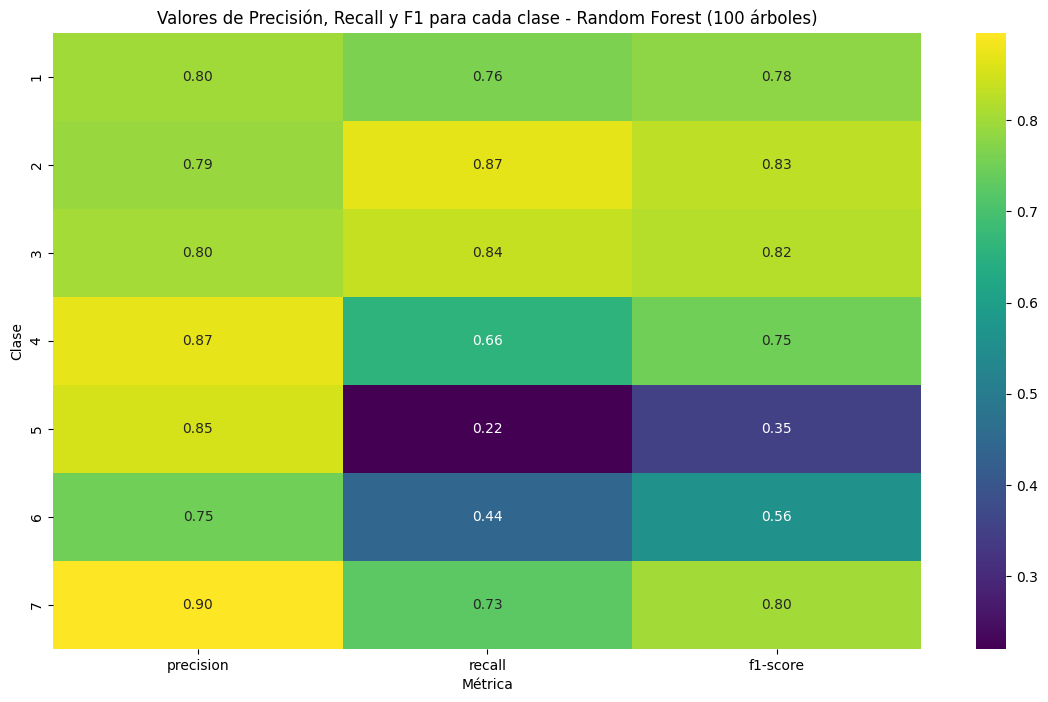

In [50]:
from sklearn.metrics import classification_report

# Predecir las etiquetas del conjunto de prueba con el modelo de 100 árboles
y_pred_100 = model_100_trees.predict(X_test_scaled)

# Generar el reporte de clasificación
report_100 = classification_report(y_test, y_pred_100, output_dict=True)

# Convertir el reporte a un DataFrame para facilitar la visualización
report_df_100 = pd.DataFrame(report_100).transpose()

# Filtrar solo las clases (excluyendo 'accuracy', 'macro avg' y 'weighted avg')
class_report_df_100 = report_df_100.iloc[:-3, :]

# Visualizar los resultados
plt.figure(figsize=(14, 8))
sns.heatmap(class_report_df_100[['precision', 'recall', 'f1-score']], annot=True, cmap='viridis', fmt='.2f')
plt.title('Valores de Precisión, Recall y F1 para cada clase - Random Forest (100 árboles)')
plt.xlabel('Métrica')
plt.ylabel('Clase')
plt.show()

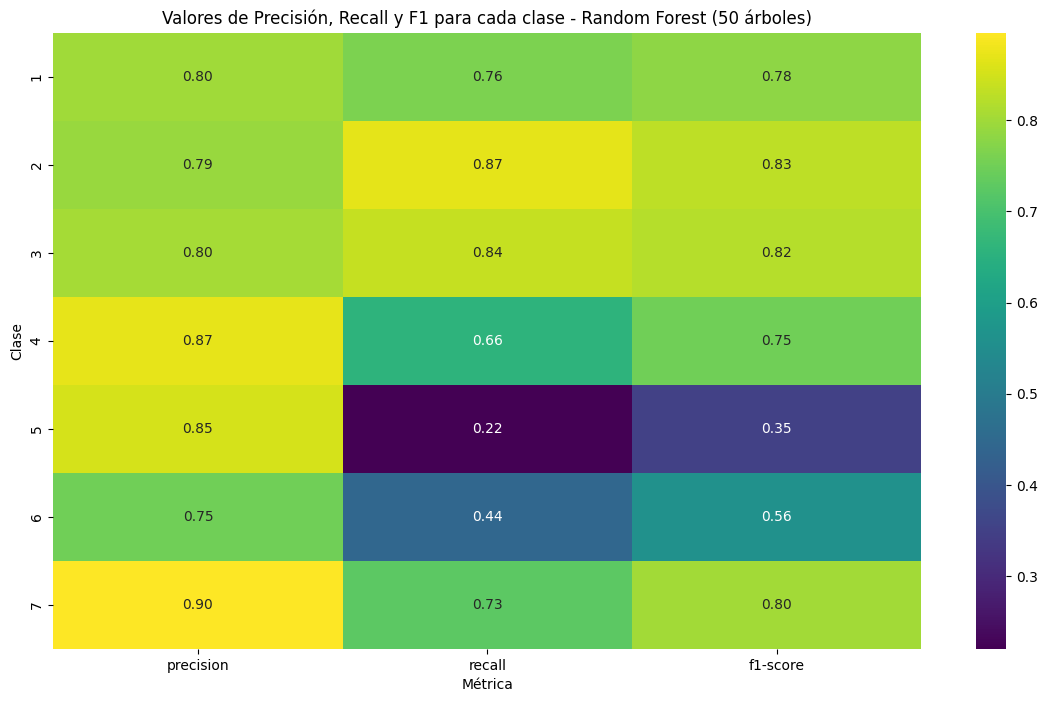

In [51]:
from sklearn.metrics import classification_report

# Predecir las etiquetas del conjunto de prueba con el modelo de 100 árboles
y_pred_50 = model_50_trees.predict(X_test_scaled)

# Generar el reporte de clasificación
report_50 = classification_report(y_test, y_pred_50, output_dict=True)

# Convertir el reporte a un DataFrame para facilitar la visualización
report_df_50 = pd.DataFrame(report_50).transpose()

# Filtrar solo las clases (excluyendo 'accuracy', 'macro avg' y 'weighted avg')
class_report_df_50 = report_df_50.iloc[:-3, :]

# Visualizar los resultados
plt.figure(figsize=(14, 8))
sns.heatmap(class_report_df_50[['precision', 'recall', 'f1-score']], annot=True, cmap='viridis', fmt='.2f')
plt.title('Valores de Precisión, Recall y F1 para cada clase - Random Forest (50 árboles)')
plt.xlabel('Métrica')
plt.ylabel('Clase')
plt.show()

<p>Como podemos observar en estas gráficas anteriores, al tener un dataset tan desbalanceado hay algunas clases, sobre todo las minoritarias, que tienen peores reultados en cuanto a recall y f1-score, esto es porque al tener muy pocas muestras es más probable que el modelo no las entrene bien y más probable también que cometa errores. Pero aún así y para lo desbalanceado que está el dataset, no están nada mal los resultados que hemos obtenido. Ahora, para poder comparar justamente, vamos a hacer un árbol con 50 y 100, usando grid search y usando el balanceo de tomek links, que, como veremos posteriormetne, es el que mejores resultaodos aloja, para comparar con los resultados que hemos obtenido actualmente.  </p>

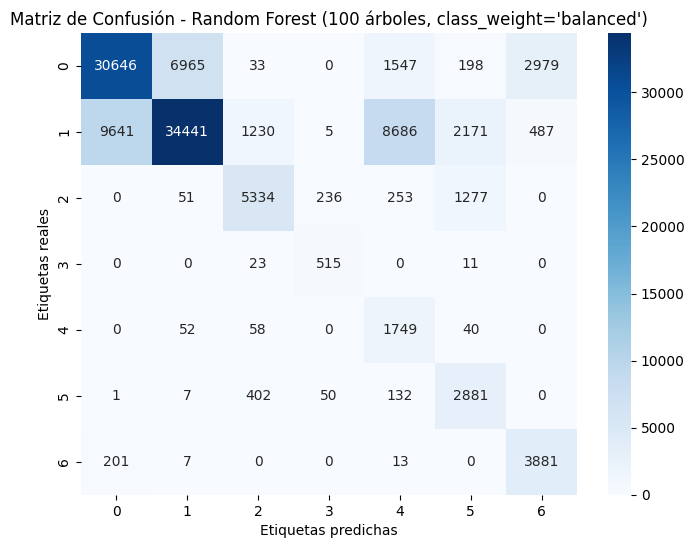

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.76      0.72      0.74     42368
           2       0.83      0.61      0.70     56661
           3       0.75      0.75      0.75      7151
           4       0.64      0.94      0.76       549
           5       0.14      0.92      0.24      1899
           6       0.44      0.83      0.57      3473
           7       0.53      0.95      0.68      4102

    accuracy                           0.68    116203
   macro avg       0.58      0.82      0.64    116203
weighted avg       0.76      0.68      0.71    116203

Accuracy: 0.6837
Balanced Accuracy: 0.8160


In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fixed_params = {
    'n_estimators': 100,
    'criterion': 'gini',
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': None,
    'random_state': 1,
    'class_weight': 'balanced'  # Ajuste para compensar el desbalanceo
}

rf = RandomForestClassifier(**fixed_params)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Random Forest (100 árboles, class_weight='balanced')")
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")
plt.show()

## Reporte de clasificación 
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

## Métricas adicionales
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fixed_params = {
    'n_estimators': 20,
    'criterion': 'gini',
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': None,
    'random_state': 1,
    'class_weight': 'balanced'  # Ajuste para compensar el desbalanceo
}

rf = RandomForestClassifier(**fixed_params)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Random Forest (100 árboles, class_weight='balanced')")
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")
plt.show()

## Reporte de clasificación 
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

## Métricas adicionales
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")

**Support Vector Machine**

In [53]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

- C: Determina cuánto queremos evitar errores. Si es alto, el modelo será más estricto, pero puede sobreajustarse. Si es bajo, será más flexible y permitirá más errores.
- kernel: Es la función que transforma los datos para encontrar la mejor forma de separarlos. Los más comunes son 'lineal', 'polinómico' y 'rbf'.
- degree: Es el grado del polinomio si elegimos el kernel 'poly'. Básicamente, decide qué tan compleja será la curva de separación.
- gamma: Indica cuánto influyen los puntos de datos. Un valor alto se enfoca en puntos cercanos y uno bajo considera también los más lejanos.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

<p>Este parámetro define cómo se estructura la decisión en problemas multiclase. Puede ser 'ovo' (one-versus-one) o 'ovr' (one-versus-rest). Permite elegir la estrategia para clasificar cuando hay más de dos clases. 'ovo' compara cada par de clases por separado, mientras que 'ovr' enfrenta cada clase contra el resto.</p>

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

In [91]:
# Mostrar los porcentajes de cada clase en el dataset original
class_distribution = df['Cover_Type'].value_counts(normalize=True) * 100
print("Distribución de clases en el dataset original:")
print(class_distribution)

Distribución de clases en el dataset original:
Cover_Type
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: proportion, dtype: float64


In [121]:
# Reducir el dataset a 10000 instancias manteniendo la distribución de clases

# Seleccionar 10000 instancias manteniendo la distribución de clases
df_subset, _ = train_test_split(df, train_size=10000, stratify=df['Cover_Type'], random_state=1)

# Mostrar la distribución de clases en el nuevo dataset
subset_class_distribution = df_subset['Cover_Type'].value_counts(normalize=True) * 100
print("\nDistribución de clases en el dataset reducido:")
print(subset_class_distribution)


Distribución de clases en el dataset reducido:
Cover_Type
2    48.76
1    36.46
3     6.15
7     3.53
6     2.99
5     1.64
4     0.47
Name: proportion, dtype: float64


In [122]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 292761 to 119197
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           10000 non-null  int64
 1   Aspect                              10000 non-null  int64
 2   Slope                               10000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    10000 non-null  int64
 4   Vertical_Distance_To_Hydrology      10000 non-null  int64
 5   Horizontal_Distance_To_Roadways     10000 non-null  int64
 6   Hillshade_9am                       10000 non-null  int64
 7   Hillshade_Noon                      10000 non-null  int64
 8   Hillshade_3pm                       10000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  10000 non-null  int64
 10  Wilderness_Area1                    10000 non-null  int64
 11  Wilderness_Area2                    10000 non-null  int64
 12  Wil

In [123]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df_subset.drop('Cover_Type',axis=1),df_subset['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
X_train.shape, X_test.shape

((8000, 54), (2000, 54))

Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

In [124]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


scaler = StandardScaler()

## POR AHORA, NO VAMOS HACER NADA MÁS QUE UN STANDARD SCALER PARA VER QUÉ RESULTADOS OBTENEMOS Y CUÁL ES EL RESULTADO DEL MODELO PARA ESTOS DATOS, A VER QUÉ PASA. 
## MÁS ADELANTE USAREMOS GRID SEARCH PARA OPTIMIZAR LOS HIPERPARÁMETROS Y HAREMOS TÉCNICAS DE OVERSAMPLING O UNDERSAMPLING PARA VER SI MEJORAMOS EL RESULTADO.

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [125]:
from sklearn.svm import SVC

# Define C values on a logarithmic scale from 0.1 to 1000
C = {0.1, 1, 10, 100, 1000}
kernel = 'rbf'  # radial basis function kernel
gamma = 'scale'  # scale based on number of features and variance

# Create SVM classifiers with different C values
svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]

In [126]:
# Entrenar los modelos de SVM
for model in svc:
    model.fit(X_train, y_train)

Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

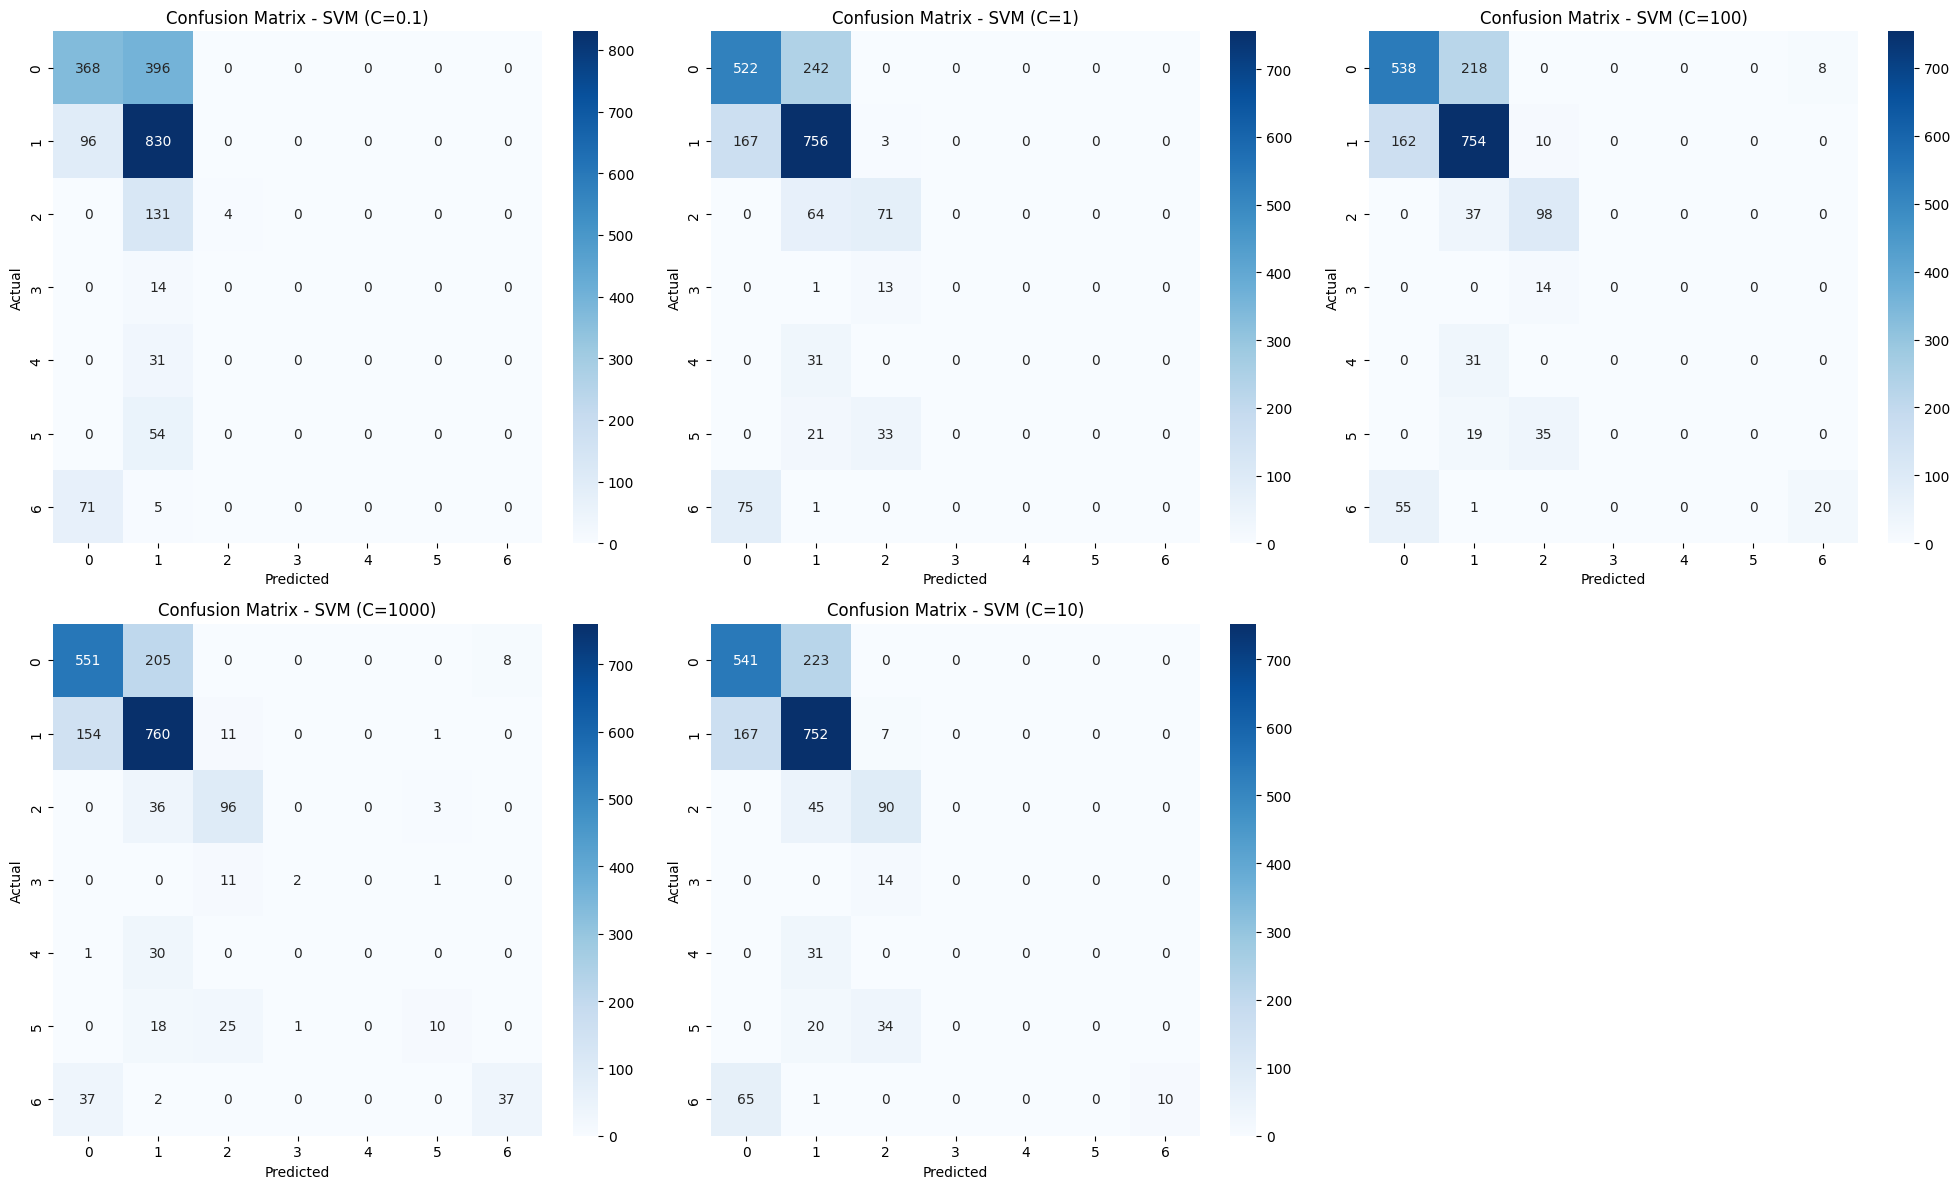

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, model in enumerate(svc):
    # Predict using the current model
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix - SVM (C={model.C})')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Remove the last (empty) subplot
axes[-1].remove()

plt.tight_layout()
plt.show()

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

In [128]:
# Mostrar los ejemplos correctamente clasificados por cada modelo de SVM
for model in svc:
    y_pred = model.predict(X_test)
    correct_predictions = np.sum(y_pred == y_test)
    print(f"Modelo SVM con C={model.C} ha clasificado correctamente {correct_predictions} ejemplos.")

Modelo SVM con C=0.1 ha clasificado correctamente 1202 ejemplos.
Modelo SVM con C=1 ha clasificado correctamente 1349 ejemplos.
Modelo SVM con C=100 ha clasificado correctamente 1410 ejemplos.
Modelo SVM con C=1000 ha clasificado correctamente 1456 ejemplos.
Modelo SVM con C=10 ha clasificado correctamente 1393 ejemplos.


<h1>PUNTO DE INFLEXIÓN DE LA PRÁCTICA</h1>
<p>Como podemos observar en este código que hemos realizado anteriormente, pasa algo bastante curioso pero que tiene bastante lógica basándonos más en la parte matemática de entrenar un modelo. Para el modelo, es muy sencillo hacer lo siguiente: como las 3 primeras clases suponen más del 90% del dataset, se "olvida" del resto de clases y sólo clasifica en las tres primeras. Esto es porque así, la clasificación es más sencilla, al ser sólo tres clases, y puede "acotar" más la solución, obteniendo así mejores resultados (teniendo en cuenta sólo la precisión). Por tanto, ahora, vamos a plantear el entrenamiento de otra manera. Debemos aplicar varios cambios para que esto vaya a mejor. Empezaremos por aplicar varias técnicas para igualar el número de ejemplos en cada una de las clases. Para ello usaremos técnicas como oversampling, undersampling o SMOTE. Con ellos, seguro que obtendremos mejores resultados. También, haremos una hiperparemterización mayor del modelo, para intentar mejorar lo máximo posible, para ello, usaremos gridSearch. A continuación, los cambios: </p>

In [129]:
# Definir los parámetros para el GridSearch
param_grid = {
    'svm__C': [0.1, 1, 10, 100, 1000],
    'svm__kernel': ['rbf', 'linear'],
    'svm__gamma': ['scale', 'auto'],
}

# Crear el pipeline con el escalador y el clasificador SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Crear el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='balanced_accuracy'
)

<h2>Oversampling</h2>

In [130]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from collections import Counter

# Guardamos los datos originales en nuevas variables para no modificarlos
X_train_over = X_train.copy()
y_train_over = y_train.copy()

# Mostramos la distribución original
print("Distribución original de clases:")
print(Counter(y_train_over))

# Aplicamos diferentes técnicas de oversampling
# 1. Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train_over, y_train_over)

# 2. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_over, y_train_over)

# Mostramos las distribuciones después del oversampling
print("\nDistribución después de Random Oversampling:")
print(Counter(y_ros))
print("\nDistribución después de SMOTE:")
print(Counter(y_smote))

Distribución original de clases:
Counter({2: 3950, 1: 2882, 3: 480, 7: 277, 6: 245, 5: 133, 4: 33})



Distribución después de Random Oversampling:
Counter({2: 3950, 1: 3950, 7: 3950, 3: 3950, 5: 3950, 4: 3950, 6: 3950})

Distribución después de SMOTE:
Counter({2: 3950, 1: 3950, 7: 3950, 3: 3950, 5: 3950, 4: 3950, 6: 3950})


In [131]:
# Este código se encuentra comentado porque su ejecución es muy tardada. 
# Se ha ejecutado anteriormente y sus resultados se encuentran en el archivo "salidas.txt"
#svm_ros = grid_search.fit(X_ros, y_ros)
#print("BEST PARAMS: ",svm_ros.best_params_)
#print("BEST SCORE: ", svm_ros.best_score_)

In [132]:
# Este código se encuentra comentado porque su ejecución es muy tardada. 
# Se ha ejecutado anteriormente y sus resultados se encuentran en el archivo "salidas.txt"
#svm_smote = grid_search.fit(X_smote, y_smote)
#print("BEST PARAMS: ",svm_smote.best_params_)
#print("BEST SCORE: ", svm_smote.best_score_)

<h2>Undersampling</h2>

In [133]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks
from collections import Counter

# Guardamos los datos originales en nuevas variables para no modificarlos
X_train_under = X_train.copy()
y_train_under = y_train.copy()

# Mostramos la distribución original
print("Distribución original de clases:")
print(Counter(y_train_under))

# Aplicamos diferentes técnicas de undersampling
# 1. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_under, y_train_under)

# 2. Cluster Centroids
cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_resample(X_train_under, y_train_under)

# 3. Tomek Links
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train_under, y_train_under)

# Mostramos las distribuciones después del undersampling
print("\nDistribución después de Random Undersampling:")
print(Counter(y_rus))
print("\nDistribución después de Cluster Centroids:")
print(Counter(y_cc))
print("\nDistribución después de Tomek Links:")
print(Counter(y_tl))

Distribución original de clases:
Counter({2: 3950, 1: 2882, 3: 480, 7: 277, 6: 245, 5: 133, 4: 33})



Distribución después de Random Undersampling:
Counter({1: 33, 2: 33, 3: 33, 4: 33, 5: 33, 6: 33, 7: 33})

Distribución después de Cluster Centroids:
Counter({1: 33, 2: 33, 3: 33, 4: 33, 5: 33, 6: 33, 7: 33})

Distribución después de Tomek Links:
Counter({2: 3647, 1: 2614, 3: 420, 7: 247, 6: 204, 5: 106, 4: 33})


In [134]:
# Este código se encuentra comentado porque su ejecución es muy tardada. 
# Se ha ejecutado anteriormente y sus resultados se encuentran en el archivo "salidas.txt"
#svm_rus = grid_search.fit(X_rus, y_rus)
#print("BEST PARAMS: ",svm_rus.best_params_)
#print("BEST SCORE: ", svm_rus.best_score_)

In [135]:
# Este código se encuentra comentado porque su ejecución es muy tardada. 
# Se ha ejecutado anteriormente y sus resultados se encuentran en el archivo "salidas.txt"
#svm_centroids = grid_search.fit(X_cc, y_cc)
#print("BEST PARAMS: ",svm_centroids.best_params_)
#print("BEST SCORE: ", svm_centroids.best_score_)

In [136]:
# Este código se encuentra comentado porque su ejecución es muy tardada. 
# Se ha ejecutado anteriormente y sus resultados se encuentran en el archivo "salidas.txt"
#svm_tomek = grid_search.fit(X_tl, y_tl)
#print("BEST PARAMS: ",svm_tomek.best_params_)
#print("BEST SCORE: ", svm_tomek.best_score_)

<p>Según los resultados que hemos obtenido en el grid search anterior (que se pueden observar en el archivo salida.txt), han habido varios parámetros que son más óptimos para el SVM, observamos que los valores de C más comunes son 1000 y 1, aunque este último es así para las clases de undersampling que tienen muy pocos datos para entrenamiento (por lo que se puede decir que no es muy representativo), de todas formas, los valores más comunes para gamma y kernel son scale y rbf. Vamos a hacer un entrenamiento de un SVM con C con valor 1000 para cada uno de los datos de entrada que tenemos para poder ahora, hacer un análisis con el conjunto de test para ver si se ha producido sobreajuste.</p>

In [137]:
print("Entrenando el modelo con Random Oversampling...")
print("------------------------------------------")
model_ros = SVC(kernel='rbf', C=1000, gamma='scale')
svm_ros_best = model_ros.fit(X_ros, y_ros)
y_pred = svm_ros_best.predict(X_test)
accuracy_ros = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_ros}")

Entrenando el modelo con Random Oversampling...
------------------------------------------
Accuracy: 0.6405


In [138]:
print("Entrenando el modelo con SMOTE...")
print("------------------------------------------")
model_smote = SVC(kernel='rbf', C=1000, gamma='scale')
svm_smote_best = model_smote.fit(X_smote, y_smote)
y_pred = svm_smote_best.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred)
print(f"Accuracy SMOTE: {accuracy_smote}")

Entrenando el modelo con SMOTE...
------------------------------------------
Accuracy SMOTE: 0.655


In [139]:
print("Entrenando el modelo con Random Undersampling...")
print("------------------------------------------")
model_rus = SVC(kernel='rbf', C=1000, gamma='scale')
svm_rus_best = model_rus.fit(X_rus, y_rus)
y_pred = svm_rus_best.predict(X_test)
accuracy_rus = accuracy_score(y_test, y_pred)
print(f"Accuracy RUS: {accuracy_rus}")

Entrenando el modelo con Random Undersampling...
------------------------------------------
Accuracy RUS: 0.45


In [140]:
print("Entrenando el modelo con Centroids...")
print("------------------------------------------")
model_centroids = SVC(kernel='rbf', C=1000, gamma='scale')
svm_centroids_best = model_centroids.fit(X_cc, y_cc)
y_pred = svm_centroids_best.predict(X_test)
accuracy_centroids = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_centroids}")

Entrenando el modelo con Centroids...
------------------------------------------
Accuracy: 0.504


In [141]:
print("Entrenando el modelo con Tomek...")
print("------------------------------------------")
model_tomek = SVC(kernel='rbf', C=1000, gamma='scale')
svm_tomek_best = model_tomek.fit(X_tl, y_tl)
y_pred = svm_tomek_best.predict(X_test)
accuracy_tomek = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_tomek}")

Entrenando el modelo con Tomek...
------------------------------------------
Accuracy: 0.7285


Matriz de Confusión:
[[534 112   1   0  23   2  92]
 [210 520  24   0 125  35  12]
 [  0   4  87   7   4  33   0]
 [  0   0   2  10   0   2   0]
 [  0   4   3   0  24   0   0]
 [  0   2  10   2   1  39   0]
 [  8   1   0   0   0   0  67]]


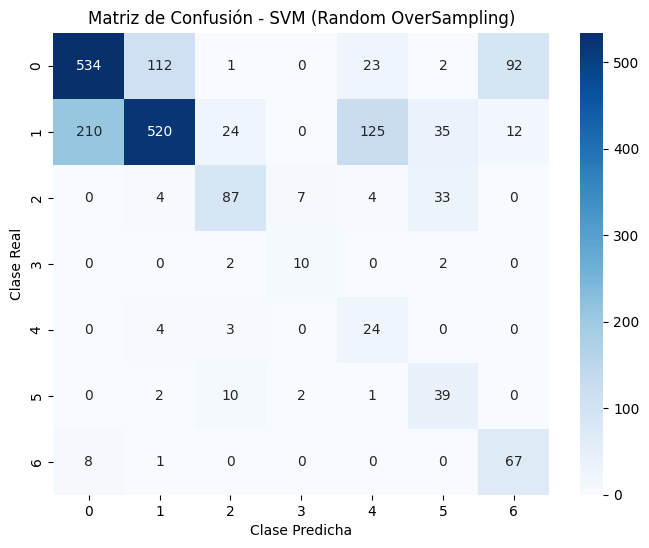

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.71      0.70      0.70       764
           2       0.81      0.56      0.66       926
           3       0.69      0.64      0.66       135
           4       0.53      0.71      0.61        14
           5       0.14      0.77      0.23        31
           6       0.35      0.72      0.47        54
           7       0.39      0.88      0.54        76

    accuracy                           0.64      2000
   macro avg       0.52      0.71      0.55      2000
weighted avg       0.72      0.64      0.66      2000



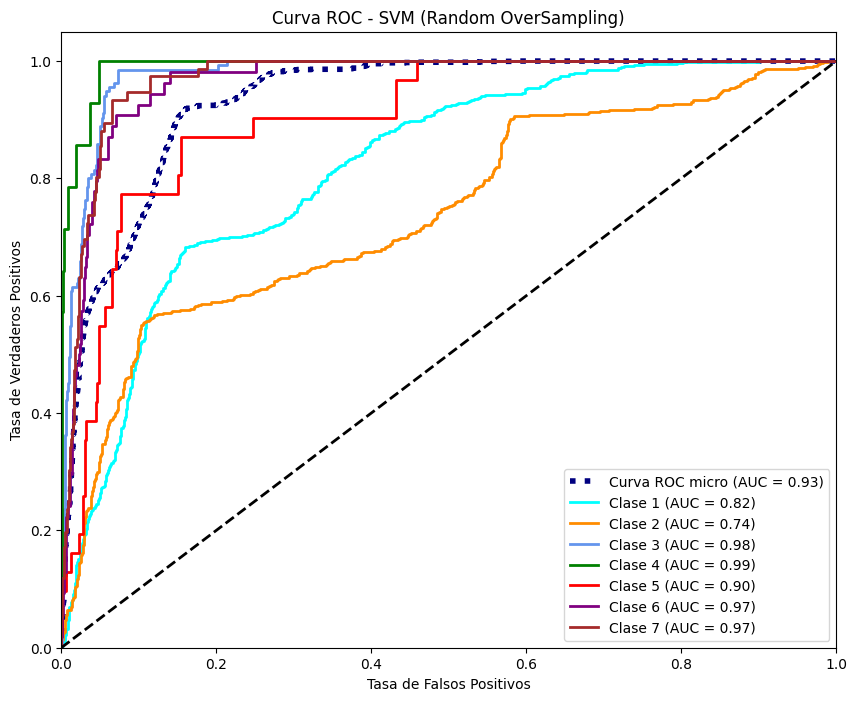

In [142]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np
# IMPORTAR LIBRERÍAS NECESARIAS
import matplotlib.pyplot as plt

# CALCULAR LAS PREDICCIONES DEL MODELO
y_pred = svm_ros_best.predict(X_test)

# CALCULAR Y MOSTRAR LA MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - SVM (Random OverSampling)')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

# MOSTRAR LAS MÉTRICAS: PRECISIÓN, RECALL, F1-SCORE, ETC.
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# CALCULAR Y GRAFICAR LA CURVA ROC MULTICLASE
# Primero, definimos las clases (suponiendo que las clases están representadas por números)
classes = np.unique(y_test)
n_classes = len(classes)

# Convertir las etiquetas de test a una representación binarizada
# (Esto es necesario para calcular la ROC en el contexto one-vs-rest)
y_test_bin = label_binarize(y_test, classes=classes)

# Nota: Muchos clasificadores SVM no tienen probability=True (ni métodos predict_proba)
# por lo que usaremos decision_function para obtener un score.
# Si tu modelo hubiera sido entrenado con probability=True, podrías usar predict_proba.
try:
    y_score = svm_ros_best.decision_function(X_test)
except AttributeError:
    print("El modelo no dispone de decision_function(). Comprueba si está entrenado con probability=True")
    y_score = None

if y_score is not None:
    # Calcular la curva ROC y el área bajo la curva para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular la curva ROC micro (conjunto de todas las clases)
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Graficar todas las curvas ROC
    plt.figure(figsize=(10,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='Curva ROC micro (AUC = {0:0.2f})'.format(roc_auc["micro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Clase {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - SVM (Random OverSampling)')
    plt.legend(loc="lower right")
    plt.show()

Matriz de Confusión - SVM (SMOTE):
[[539 114   1   0  22   2  86]
 [204 542  25   0 113  34   8]
 [  0   3  91   3   3  35   0]
 [  0   0   1  10   0   3   0]
 [  0   6   3   0  22   0   0]
 [  0   3   9   2   1  39   0]
 [  8   1   0   0   0   0  67]]


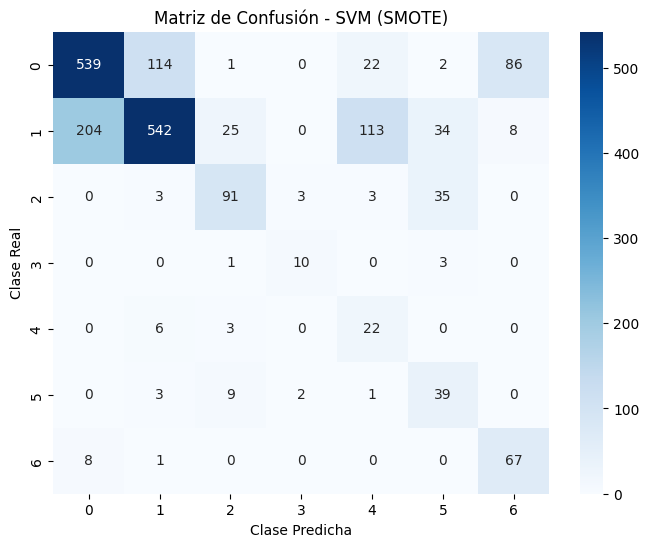

Reporte de Clasificación - SVM (SMOTE):
              precision    recall  f1-score   support

           1       0.72      0.71      0.71       764
           2       0.81      0.59      0.68       926
           3       0.70      0.67      0.69       135
           4       0.67      0.71      0.69        14
           5       0.14      0.71      0.23        31
           6       0.35      0.72      0.47        54
           7       0.42      0.88      0.57        76

    accuracy                           0.66      2000
   macro avg       0.54      0.71      0.58      2000
weighted avg       0.73      0.66      0.68      2000



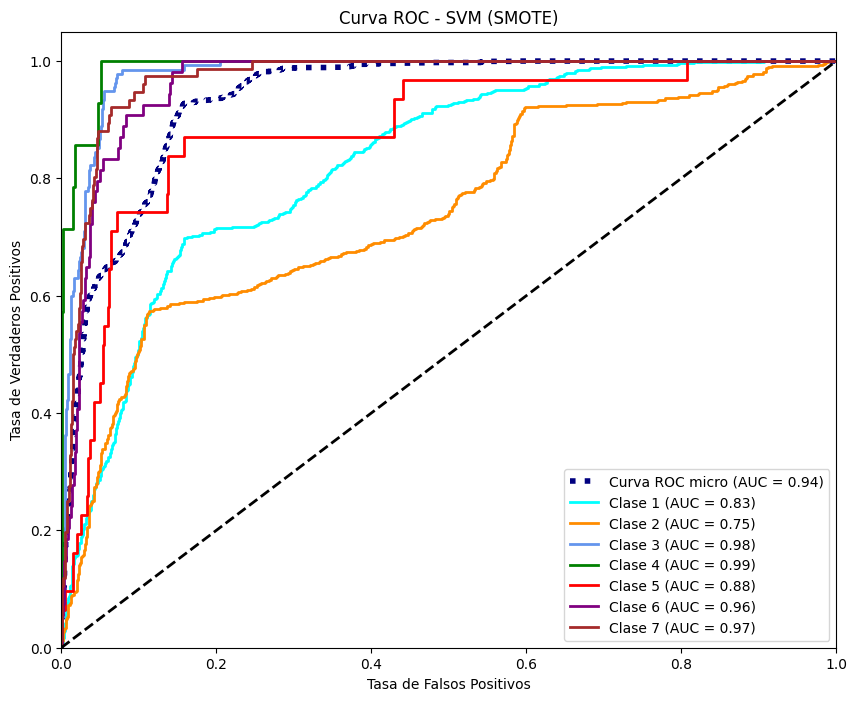

In [143]:
# Predicciones con el modelo SVM entrenado con SMOTE
y_pred_smote = svm_smote_best.predict(X_test)

# Calcular y visualizar la matriz de confusión
cm_smote = confusion_matrix(y_test, y_pred_smote)
print("Matriz de Confusión - SVM (SMOTE):")
print(cm_smote)

plt.figure(figsize=(8,6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - SVM (SMOTE)')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

# Mostrar reporte de clasificación
print("Reporte de Clasificación - SVM (SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Calcular la curva ROC MULTICLASE
# Primero se binerizan los valores reales
classes = np.unique(y_test)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Se intenta utilizar decision_function para obtener los scores
try:
    y_score_smote = svm_smote_best.decision_function(X_test)
except AttributeError:
    print("El modelo no implementa decision_function(). Asegúrate de haberlo entrenado con probability=True o usa predict_proba().")
    y_score_smote = None

if y_score_smote is not None:
    # Calcular las curvas ROC y el AUC para cada clase
    fpr_smote = dict()
    tpr_smote = dict()
    roc_auc_smote = dict()
    for i in range(n_classes):
        fpr_smote[i], tpr_smote[i], _ = roc_curve(y_test_bin[:, i], y_score_smote[:, i])
        roc_auc_smote[i] = auc(fpr_smote[i], tpr_smote[i])
    
    # Calcular la curva ROC micro (one-vs-rest)
    fpr_smote["micro"], tpr_smote["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_smote.ravel())
    roc_auc_smote["micro"] = auc(fpr_smote["micro"], tpr_smote["micro"])
    
    # Graficar todas las curvas ROC
    plt.figure(figsize=(10,8))
    plt.plot(fpr_smote["micro"], tpr_smote["micro"],
             label='Curva ROC micro (AUC = {:.2f})'.format(roc_auc_smote["micro"]),
             color='navy', linestyle=':', linewidth=4)
    
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_smote[i], tpr_smote[i], color=color, lw=2,
                 label='Clase {} (AUC = {:.2f})'.format(classes[i], roc_auc_smote[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - SVM (SMOTE)')
    plt.legend(loc="lower right")
    plt.show()

Matriz de Confusión - SVM (Random Undersampling):
[[415 144   2   0  59   4 140]
 [341 287  44   0 210  25  19]
 [  0   6  80  16   4  29   0]
 [  0   0   2  11   0   1   0]
 [  1   5   5   0  20   0   0]
 [  0   3  20   3   3  25   0]
 [ 13   0   0   0   1   0  62]]


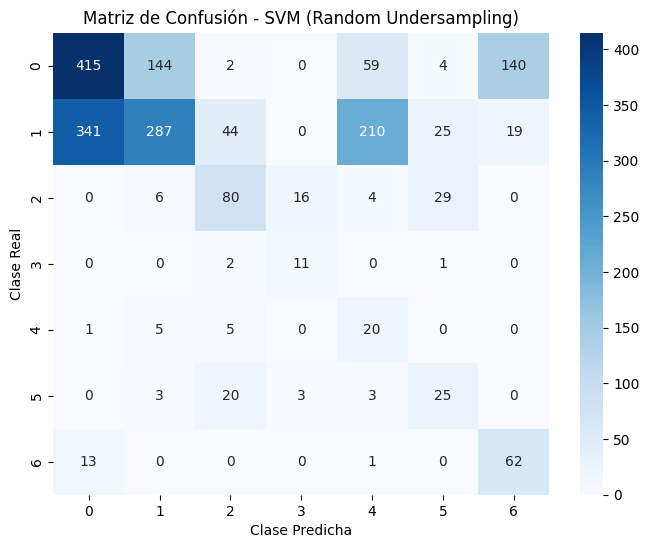

Reporte de Clasificación - SVM (Random Undersampling):
              precision    recall  f1-score   support

           1       0.54      0.54      0.54       764
           2       0.64      0.31      0.42       926
           3       0.52      0.59      0.56       135
           4       0.37      0.79      0.50        14
           5       0.07      0.65      0.12        31
           6       0.30      0.46      0.36        54
           7       0.28      0.82      0.42        76

    accuracy                           0.45      2000
   macro avg       0.39      0.59      0.42      2000
weighted avg       0.56      0.45      0.47      2000



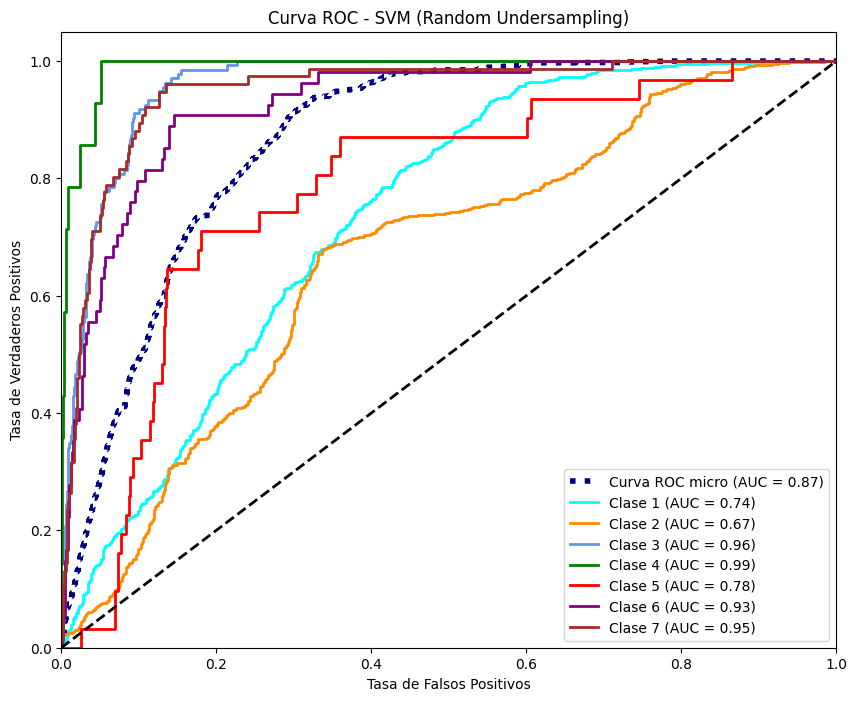

In [144]:
# Usamos el modelo con Random Undersampling (svm_rus_best) y realizamos las predicciones
y_pred_rus = svm_rus_best.predict(X_test)

# Calculamos y mostramos la matriz de confusión
cm_rus = confusion_matrix(y_test, y_pred_rus)
print("Matriz de Confusión - SVM (Random Undersampling):")
print(cm_rus)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rus, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - SVM (Random Undersampling)')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

# Mostramos el reporte de clasificación
print("Reporte de Clasificación - SVM (Random Undersampling):")
print(classification_report(y_test, y_pred_rus))

# Procedemos a calcular y graficar la curva ROC multiclase.
# Primero, se binerizan las etiquetas verdaderas:
classes = np.unique(y_test)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)

try:
    # Obtenemos los scores a través de decision_function
    y_score_rus = svm_rus_best.decision_function(X_test)
except AttributeError:
    print("El modelo no implementa 'decision_function()'. Asegúrate de entrenarlo con probability=True o usa 'predict_proba()'.")
    y_score_rus = None

if y_score_rus is not None:
    # Calcular la curva ROC y el área debajo de la curva para cada clase
    fpr_rus = dict()
    tpr_rus = dict()
    roc_auc_rus = dict()
    for i in range(n_classes):
        fpr_rus[i], tpr_rus[i], _ = roc_curve(y_test_bin[:, i], y_score_rus[:, i])
        roc_auc_rus[i] = auc(fpr_rus[i], tpr_rus[i])
    
    # Curva ROC micro (one-vs-rest)
    fpr_rus["micro"], tpr_rus["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_rus.ravel())
    roc_auc_rus["micro"] = auc(fpr_rus["micro"], tpr_rus["micro"])
    
    # Graficar todas las curvas ROC
    plt.figure(figsize=(10,8))
    plt.plot(fpr_rus["micro"], tpr_rus["micro"],
             label='Curva ROC micro (AUC = {0:0.2f})'.format(roc_auc_rus["micro"]),
             color='navy', linestyle=':', linewidth=4)
    
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_rus[i], tpr_rus[i], color=color, lw=2,
                 label='Clase {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc_rus[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - SVM (Random Undersampling)')
    plt.legend(loc="lower right")
    plt.show()

Matriz de Confusión - SVM (Cluster Centroids):
[[414 139   1   0  32   6 172]
 [243 380  23   2 195  60  23]
 [  0   1  76  14   7  37   0]
 [  0   0   4  10   0   0   0]
 [  0   1   2   0  28   0   0]
 [  0   0  13   8   3  30   0]
 [  5   0   0   0   1   0  70]]


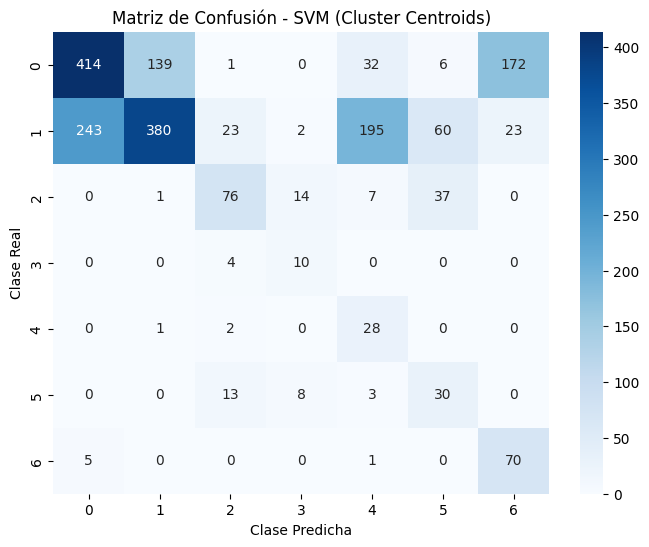

Reporte de Clasificación - SVM (Cluster Centroids):
              precision    recall  f1-score   support

           1       0.63      0.54      0.58       764
           2       0.73      0.41      0.53       926
           3       0.64      0.56      0.60       135
           4       0.29      0.71      0.42        14
           5       0.11      0.90      0.19        31
           6       0.23      0.56      0.32        54
           7       0.26      0.92      0.41        76

    accuracy                           0.50      2000
   macro avg       0.41      0.66      0.43      2000
weighted avg       0.64      0.50      0.54      2000



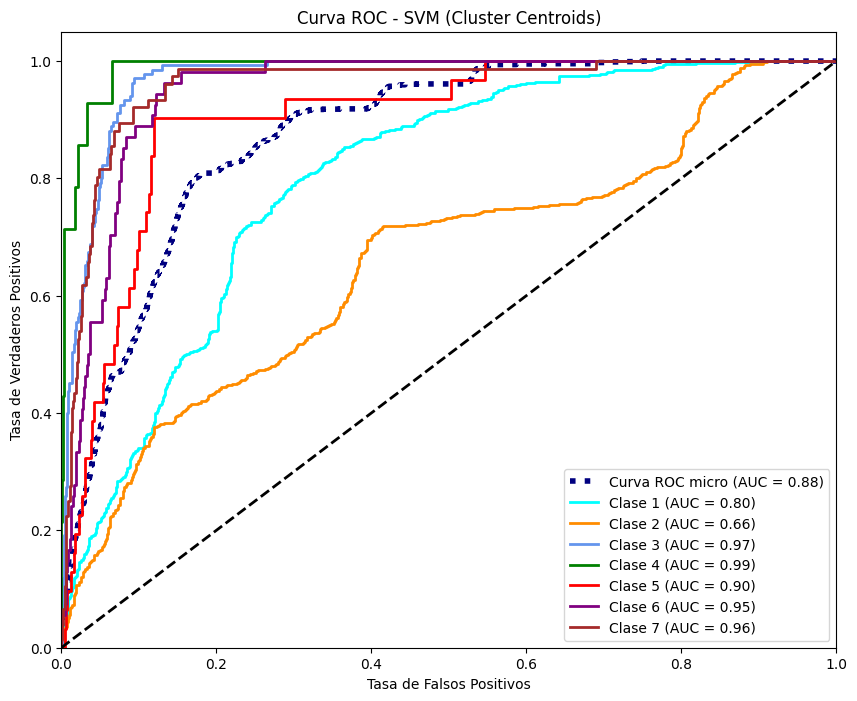

In [145]:
# Predicciones con el modelo SVM entrenado con Cluster Centroids
y_pred_centroids = svm_centroids_best.predict(X_test)

# Calcular y visualizar la matriz de confusión
cm_centroids = confusion_matrix(y_test, y_pred_centroids)
print("Matriz de Confusión - SVM (Cluster Centroids):")
print(cm_centroids)

plt.figure(figsize=(8,6))
sns.heatmap(cm_centroids, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - SVM (Cluster Centroids)')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

# Mostrar reporte de clasificación
print("Reporte de Clasificación - SVM (Cluster Centroids):")
print(classification_report(y_test, y_pred_centroids))

# Calcular la curva ROC MULTICLASE
# Primero se binerizan los valores reales
classes = np.unique(y_test)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Se intenta utilizar decision_function para obtener los scores
try:
    y_score_centroids = svm_centroids_best.decision_function(X_test)
except AttributeError:
    print("El modelo no implementa decision_function(). Asegúrate de haberlo entrenado con probability=True o usa predict_proba().")
    y_score_centroids = None

if y_score_centroids is not None:
    # Calcular las curvas ROC y el AUC para cada clase
    fpr_centroids = dict()
    tpr_centroids = dict()
    roc_auc_centroids = dict()
    for i in range(n_classes):
        fpr_centroids[i], tpr_centroids[i], _ = roc_curve(y_test_bin[:, i], y_score_centroids[:, i])
        roc_auc_centroids[i] = auc(fpr_centroids[i], tpr_centroids[i])
    
    # Calcular la curva ROC micro (one-vs-rest)
    fpr_centroids["micro"], tpr_centroids["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_centroids.ravel())
    roc_auc_centroids["micro"] = auc(fpr_centroids["micro"], tpr_centroids["micro"])
    
    # Graficar todas las curvas ROC
    plt.figure(figsize=(10,8))
    plt.plot(fpr_centroids["micro"], tpr_centroids["micro"],
             label='Curva ROC micro (AUC = {:.2f})'.format(roc_auc_centroids["micro"]),
             color='navy', linestyle=':', linewidth=4)
    
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_centroids[i], tpr_centroids[i], color=color, lw=2,
                 label='Clase {} (AUC = {:.2f})'.format(classes[i], roc_auc_centroids[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - SVM (Cluster Centroids)')
    plt.legend(loc="lower right")
    plt.show()

Evaluación del modelo SVM (Tomek Links)...
------------------------------------------
Matriz de Confusión - SVM (Tomek Links):
[[547 208   0   0   0   0   9]
 [155 762   8   0   0   1   0]
 [  0  34  98   0   0   3   0]
 [  0   0  11   2   0   1   0]
 [  1  30   0   0   0   0   0]
 [  0  18  25   1   0  10   0]
 [ 37   1   0   0   0   0  38]]


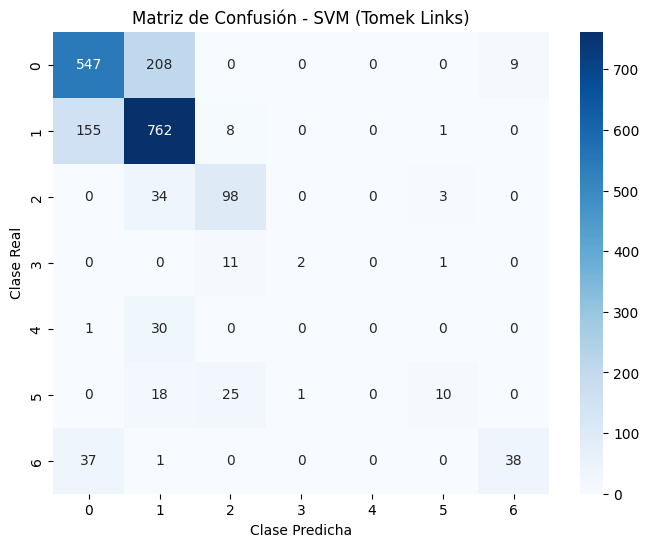

Reporte de Clasificación - SVM (Tomek Links):
              precision    recall  f1-score   support

           1       0.74      0.72      0.73       764
           2       0.72      0.82      0.77       926
           3       0.69      0.73      0.71       135
           4       0.67      0.14      0.24        14
           5       0.00      0.00      0.00        31
           6       0.67      0.19      0.29        54
           7       0.81      0.50      0.62        76

    accuracy                           0.73      2000
   macro avg       0.61      0.44      0.48      2000
weighted avg       0.72      0.73      0.72      2000



/opt/anaconda3/envs/actividad2_TAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/actividad2_TAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/actividad2_TAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

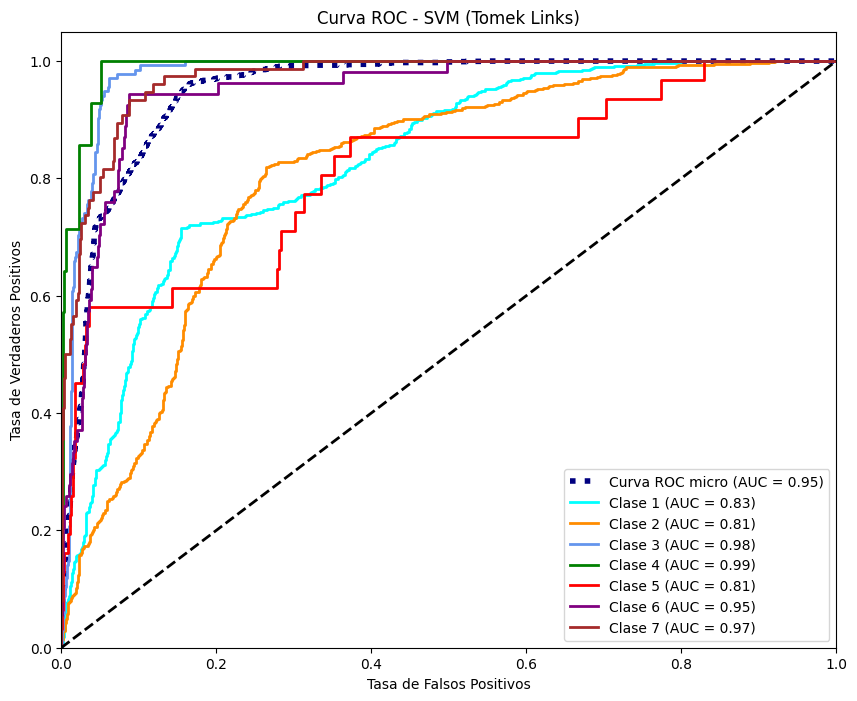

In [146]:
print("Evaluación del modelo SVM (Tomek Links)...")
print("------------------------------------------")

# Realizamos las predicciones sobre el conjunto de test
y_pred_tl = svm_tomek_best.predict(X_test)

# Calculamos y mostramos la matriz de confusión
cm_tl = confusion_matrix(y_test, y_pred_tl)
print("Matriz de Confusión - SVM (Tomek Links):")
print(cm_tl)

plt.figure(figsize=(8,6))
sns.heatmap(cm_tl, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - SVM (Tomek Links)')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

# Mostramos el reporte de clasificación
print("Reporte de Clasificación - SVM (Tomek Links):")
print(classification_report(y_test, y_pred_tl))

# Configuración para la curva ROC multiclase
classes = np.unique(y_test)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Intentamos obtener los scores mediante decision_function
try:
    y_score_tl = svm_tomek_best.decision_function(X_test)
except AttributeError:
    print("El modelo no implementa decision_function(). Comprueba si fue entrenado con probability=True o usa predict_proba().")
    y_score_tl = None

if y_score_tl is not None:
    # Para cada clase se calculan la FPR, TPR y el AUC
    fpr_tl = dict()
    tpr_tl = dict()
    roc_auc_tl = dict()
    for i in range(n_classes):
        fpr_tl[i], tpr_tl[i], _ = roc_curve(y_test_bin[:, i], y_score_tl[:, i])
        roc_auc_tl[i] = auc(fpr_tl[i], tpr_tl[i])
    
    # Curva ROC micro (one-vs-rest)
    fpr_tl["micro"], tpr_tl["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_tl.ravel())
    roc_auc_tl["micro"] = auc(fpr_tl["micro"], tpr_tl["micro"])
    
    # Graficamos la curva ROC multiclase
    plt.figure(figsize=(10,8))
    plt.plot(fpr_tl["micro"], tpr_tl["micro"],
             label='Curva ROC micro (AUC = {:.2f})'.format(roc_auc_tl["micro"]),
             color='navy', linestyle=':', linewidth=4)
    
    # Se definen colores para cada clase
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_tl[i], tpr_tl[i], color=color, lw=2,
                 label='Clase {} (AUC = {:.2f})'.format(classes[i], roc_auc_tl[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - SVM (Tomek Links)')
    plt.legend(loc="lower right")
    plt.show() 

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

<p>Al final de esta sección seleccionaremos el mejor modelo aplicando predicciones sobre el conjunto de datos de test</p>

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

Modelo: SVM (SMOTE)
Matriz de Confusión:
[[539 114   1   0  22   2  86]
 [204 542  25   0 113  34   8]
 [  0   3  91   3   3  35   0]
 [  0   0   1  10   0   3   0]
 [  0   6   3   0  22   0   0]
 [  0   3   9   2   1  39   0]
 [  8   1   0   0   0   0  67]]


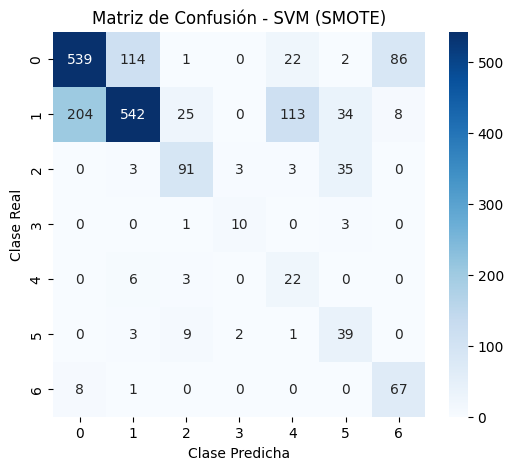

Ejemplos correctamente clasificados: 1310 de 2000
Ejemplos incorrectamente clasificados: 690 de 2000
--------------------------------------------------
Modelo: SVM (Random Undersampling)
Matriz de Confusión:
[[415 144   2   0  59   4 140]
 [341 287  44   0 210  25  19]
 [  0   6  80  16   4  29   0]
 [  0   0   2  11   0   1   0]
 [  1   5   5   0  20   0   0]
 [  0   3  20   3   3  25   0]
 [ 13   0   0   0   1   0  62]]


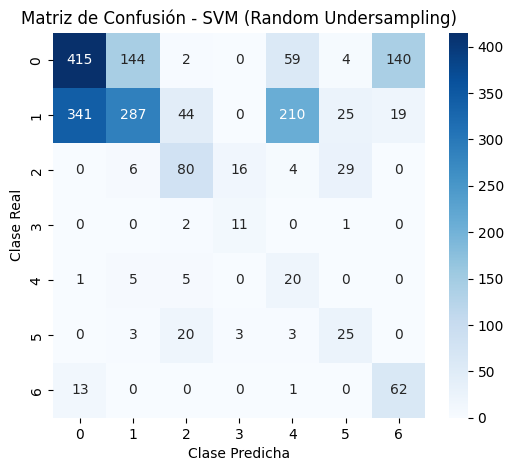

Ejemplos correctamente clasificados: 900 de 2000
Ejemplos incorrectamente clasificados: 1100 de 2000
--------------------------------------------------
Modelo: SVM (Cluster Centroids)
Matriz de Confusión:
[[414 139   1   0  32   6 172]
 [243 380  23   2 195  60  23]
 [  0   1  76  14   7  37   0]
 [  0   0   4  10   0   0   0]
 [  0   1   2   0  28   0   0]
 [  0   0  13   8   3  30   0]
 [  5   0   0   0   1   0  70]]


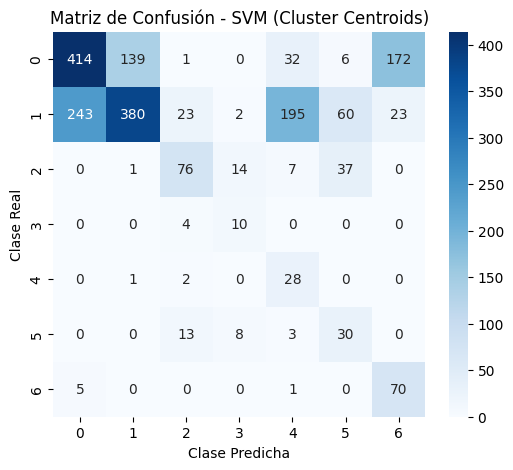

Ejemplos correctamente clasificados: 1008 de 2000
Ejemplos incorrectamente clasificados: 992 de 2000
--------------------------------------------------
Modelo: SVM (Tomek Links)
Matriz de Confusión:
[[547 208   0   0   0   0   9]
 [155 762   8   0   0   1   0]
 [  0  34  98   0   0   3   0]
 [  0   0  11   2   0   1   0]
 [  1  30   0   0   0   0   0]
 [  0  18  25   1   0  10   0]
 [ 37   1   0   0   0   0  38]]


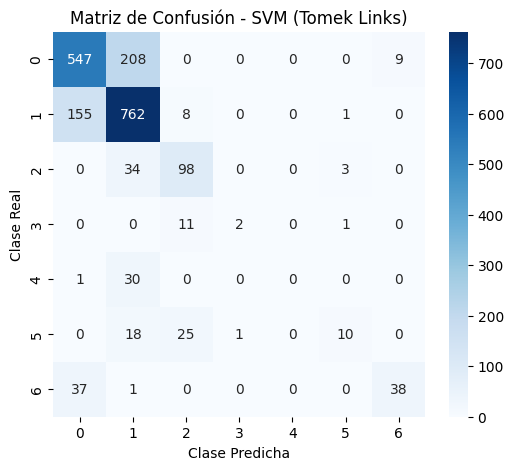

Ejemplos correctamente clasificados: 1457 de 2000
Ejemplos incorrectamente clasificados: 543 de 2000
--------------------------------------------------


In [147]:

svm_models = {
    "SVM (SMOTE)": {"y_pred": y_pred_smote, "cm": cm_smote},
    "SVM (Random Undersampling)": {"y_pred": y_pred_rus, "cm": cm_rus},
    "SVM (Cluster Centroids)": {"y_pred": y_pred_centroids, "cm": cm_centroids},
    "SVM (Tomek Links)": {"y_pred": y_pred_tl, "cm": cm_tl}
}

for model_name, data in svm_models.items():
    print("Modelo:", model_name)
    cm = data["cm"]
    # Mostrar la matriz de confusión
    print("Matriz de Confusión:")
    print(cm)
    
    # Visualizar la matriz de confusión con un heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Clase Predicha')
    plt.ylabel('Clase Real')
    plt.show()
    
    # Calcular ejemplos correctamente e incorrectamente clasificados
    total = np.sum(cm)
    correct = np.trace(cm)
    incorrect = total - correct
    
    print(f"Ejemplos correctamente clasificados: {correct} de {int(total)}")
    print(f"Ejemplos incorrectamente clasificados: {incorrect} de {int(total)}")
    print("-"*50)


Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [148]:
# Mostramos el reporte de clasificación (precisión, recall y F1) para cada modelo SVM
for model_name, data in svm_models.items():
    print(f"===== {model_name} =====")
    y_pred = data["y_pred"]
    report = classification_report(y_test, y_pred, digits=4)
    print(report)
    print("-"*60)

===== SVM (SMOTE) =====
              precision    recall  f1-score   support

           1     0.7177    0.7055    0.7116       764
           2     0.8102    0.5853    0.6796       926
           3     0.7000    0.6741    0.6868       135
           4     0.6667    0.7143    0.6897        14
           5     0.1366    0.7097    0.2292        31
           6     0.3451    0.7222    0.4671        54
           7     0.4161    0.8816    0.5654        76

    accuracy                         0.6550      2000
   macro avg     0.5418    0.7132    0.5756      2000
weighted avg     0.7284    0.6550    0.6753      2000

------------------------------------------------------------
===== SVM (Random Undersampling) =====
              precision    recall  f1-score   support

           1     0.5390    0.5432    0.5411       764
           2     0.6449    0.3099    0.4187       926
           3     0.5229    0.5926    0.5556       135
           4     0.3667    0.7857    0.5000        14
        

/opt/anaconda3/envs/actividad2_TAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/actividad2_TAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/actividad2_TAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

<p>Para todos los entrenamientos que hemos realizado hemos observado que las clases que mejor resultados obtienen en cuanto a la capacidad predictiva del modelo son aquellas que se encuentrar en mayor cantidad en nuestro dataset, lo cual tiene lógica ya que son de las clases que más puede aprender el modelo por tener una mayor cantidad de datos. </p>

<h2>CONCLUSIONES (IMPORTANTE)</h2>

<p>Según lo que hemos podido observar en los resultados que hemos obtenido, el mejor modelo de SVM que más generaliza para todos los casos es el que cumple que C=1000, un kernel='rbf' y un gamma='scale' (aunque aún hay más hiperparámetros que se podrían ajustar, pero esto sería demasiado largo). Con este modelo, hemos aplicado las 5 técnicas de balanceo que hemos visto anteriormente. Las dos técnicas que destacan sobre el resto son SMOTE y Tomek, que son las que mejores métricas han obtenido. Si observamos SMOTE, aunque la precisión ha sido mejor, es la que mejor balance a producido y es la que mejor equilibrio tienen entre precisión y recall, por lo que es muy adecuado si queremos obtener clases que se balancean de la manera más justa. Por otro lado, Tomek ha demostrado ser con la que mejores resultados de precisión se obtienen, con un 73% de precisión, aunque demuestra algo que esperábamos totalmente y es que para el modelo es casi imposible predecir bien las etiquetas que corresponden a la clase 5, en la cual hemos tenido una precisión de 0 para este caso. También, Tomek ha demostrado la mejor precisión de todos los casos en la predicción de las clases mayoritarias (1 y 2). También, muestra los mejores resultados de AUC, lo cual hace que sea la mejor opción en términos de rendimiento del modelo en general. También, de este análisis, podemos concluir que random undersampling y cluster centroids son las peores técnicas que podemos usar. </p>

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

<p>No es justo que comparemos dos modelos que se han entrenado de manera tan distinta y con datasets tan distintos (teniendo en cuenta que el arbol tiene en torno a 450k de datos de entrenamiento y hemos acortado el entrenamiento de SVM a 10k datos) por lo que es demasiado injusto. Por tanto, vamos a entrenar un random forest con 100 árboles y los hiperparámetros que hemos usado inicialmente con el dataset de tomek, para que así sea más justo compararlo con el mejor de los SVM. El código y las métricas a continuación: </p>

Matriz de Confusión - RandomForest (Tomek):
[[566 102   0   0  39   4  53]
 [146 601  15   0 114  43   7]
 [  0   0 102   2   8  23   0]
 [  0   0   0  12   0   2   0]
 [  0   3   2   0  25   1   0]
 [  0   1   4   2   3  44   0]
 [  1   1   0   0   1   0  73]]


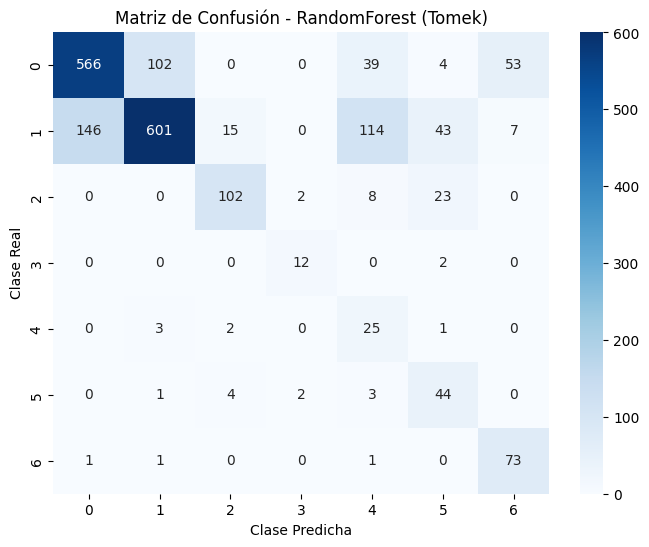

Reporte de Clasificación - RandomForest (Tomek):
              precision    recall  f1-score   support

           1       0.79      0.74      0.77       764
           2       0.85      0.65      0.74       926
           3       0.83      0.76      0.79       135
           4       0.75      0.86      0.80        14
           5       0.13      0.81      0.23        31
           6       0.38      0.81      0.51        54
           7       0.55      0.96      0.70        76

    accuracy                           0.71      2000
   macro avg       0.61      0.80      0.65      2000
weighted avg       0.79      0.71      0.74      2000



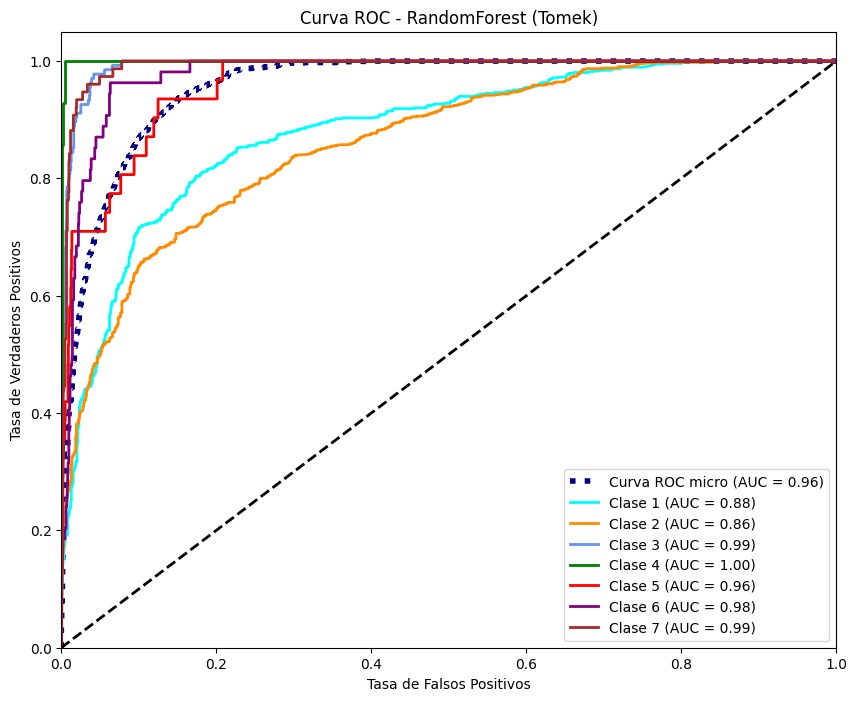

In [149]:
# Definir el modelo con los hiperparámetros originales, usando 100 árboles
rf_tomek = RandomForestClassifier(n_estimators=100,
                                    criterion='gini',
                                    max_depth=10,
                                    min_samples_split=10,
                                    min_samples_leaf=2,
                                    max_features=None,
                                    random_state=1,
                                    class_weight='balanced')

# Entrenar el modelo con el dataset obtenido tras TomekLinks
rf_tomek.fit(X_train_tl, y_train_tl)

# Realizar las predicciones sobre el conjunto de test
y_pred_rf = rf_tomek.predict(X_test)

# Calcular y mostrar la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusión - RandomForest (Tomek):")
print(cm_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - RandomForest (Tomek)')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

# Mostrar el reporte de clasificación
print("Reporte de Clasificación - RandomForest (Tomek):")
print(classification_report(y_test, y_pred_rf))

# --------------------------------------------------------------------------
# Cálculo y graficación de la Curva ROC para cada clase
# --------------------------------------------------------------------------

# Binarizamos las etiquetas reales
classes = np.unique(y_test)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Obtener las probabilidades predichas (se requiere que el estimador implemente predict_proba)
y_score_rf = rf_tomek.predict_proba(X_test)

# Inicializamos diccionarios para almacenar FPR, TPR y AUC para cada clase
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])
    
# Calcular la curva ROC micro (one-vs-rest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_rf.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Graficar las curvas ROC
plt.figure(figsize=(10,8))
plt.plot(fpr_rf["micro"], tpr_rf["micro"],
         label=f'Curva ROC micro (AUC = {roc_auc_rf["micro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
             label=f'Clase {classes[i]} (AUC = {roc_auc_rf[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - RandomForest (Tomek)')
plt.legend(loc="lower right")
plt.show()

Del apartado anterior obtenemos que el reporte de clasificación para el svm es el siguiente: 
```
===== SVM (Tomek Links) =====
              precision    recall  f1-score   support

           1     0.7392    0.7160    0.7274       764
           2     0.7236    0.8229    0.7701       926
           3     0.6901    0.7259    0.7076       135
           4     0.6667    0.1429    0.2353        14
           5     0.0000    0.0000    0.0000        31
           6     0.6667    0.1852    0.2899        54
           7     0.8085    0.5000    0.6179        76

    accuracy                         0.7285      2000
   macro avg     0.6135    0.4418    0.4783      2000
weighted avg     0.7174    0.7285    0.7151      2000
```

<p>Con esto observamos que el modelo de svm tiene mejores métricas en general, aunque se le da pero de clasificar las clases minoritarias, entonces, para responder a la pregunta de cuál es mejor, la única respuesta posible es: depende. Si queremos tener un modelo con mayor precisión en general (aunque sea por poco) usaremos svm, pero para mayor generalización y mejor entrenamiento de las clases minoritarias tenemos el random forest, el cual tiene mejores parámetros de recall y f1-score en general. Si tuviera que decantarme por un modelo para esta caso, sería algo más cercano al random forest que al SVM, aunque aún podríamos mejorar más. </p>

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.

<h3>Referencia</h3>

Ali, A., Khan, S., & Golubović, J. (2017). Classification of Cardiac Arrhythmia Using Machine Learning Techniques. Journal of Healthcare Engineering, 2017, Article ID 1497389. https://doi.org/10.1155/2017/1497389

<h3>Resto de información</h3>

Título, autores, revista, año de publicación:
- Título: Classification of Cardiac Arrhythmia Using Machine Learning Techniques
- Autores: Ali, A., Khan, S., Golubović, J.
- Revista: Journal of Healthcare Engineering
- Año: 2017

Objetivo:
- El estudio busca desarrollar un modelo de clasificación para detectar arritmias cardíacas y mejorar la precisión del diagnóstico médico automatizado.

Técnicas de clasificación empleadas y adaptaciones:
- Se utilizaron técnicas tradicionales de machine learning como k-Nearest Neighbors (k-NN) y Support Vector Machines (SVM).
- Adaptaciones: se realizó un preprocesamiento para optimizar la selección de características relevantes y reducir la dimensionalidad.

Principales resultados:
- SVM mostró una mayor precisión general, superando el 90% en la mayoría de los casos de clasificación de arritmias.
- La investigación concluyó que el modelo puede ser aplicado eficazmente en entornos clínicos para detección temprana y diagnóstico automatizado.